# EDA

**IMPORTANTE**: Recuerda hacer una copia de esta plantilla para no machacar la original.

## 1. IMPORTAR PAQUETES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#Automcompletar rápido
%config IPCompleter.greedy=True

## 2. IMPORTAR LOS DATOS

Sustituir la ruta del proyecto.

In [2]:
ruta_proyecto = 'C:/Users/Oscar/OneDrive - FM4/Escritorio/Python Data Mastery/EstructuraDirectorio/03_MACHINE_LEARNING/08_CASOS/002_RETAIL'

Nombres de los ficheros de datos.

In [3]:
nombre_cat = 'cat_resultado_calidad.pickle'
nombre_num = 'num_resultado_calidad.pickle'

Cargar los datos.

In [4]:
cat = pd.read_pickle(ruta_proyecto + '/02_Datos/03_Trabajo/' + nombre_cat)
num = pd.read_pickle(ruta_proyecto + '/02_Datos/03_Trabajo/' + nombre_num)

## 3. EDA CATEGÓRICAS

### 3.1. Análisis estadístico

No incluímos la variable 'd' ya que va a tener demasiados valores.

In [5]:
cat.columns.to_list()

['weekday',
 'wday',
 'month',
 'year',
 'day_number',
 'item_id',
 'store_id',
 'event_name_1',
 'event_type_1']

In [6]:
incluir = cat.columns.to_list()

#Eliminamos la columna 2: 'day_number'
del incluir[4]

In [7]:
def frecuencias_cat(df_cat):
    # Asegúrate de que todas las columnas son de tipo 'str' para evitar problemas de comparación
    df_cat = df_cat.astype(str)
    
    resultado = df_cat.apply(lambda x: x.value_counts(normalize = True))\
                .T.stack()\
                .to_frame().reset_index()\
                .rename(columns={'level_0':'Variable','level_1':'Valor',0: "Frecuencia"})\
                .sort_values(by = ['Variable','Frecuencia'])
    return resultado

In [8]:
pd.set_option('display.max_rows', None)

frecuencias_cat(cat[incluir])
#Aparecerá una lista de todas las variables con su frecuencia asociada

Variable                Valor  Frecuencia
41  event_name_1         Chanukah End    0.001175
48  event_name_1         Father's day    0.001175
50  event_name_1      IndependenceDay    0.001175
51  event_name_1             LaborDay    0.001175
68  event_name_1         Thanksgiving    0.001175
42  event_name_1            Christmas    0.002350
43  event_name_1        Cinco De Mayo    0.002350
45  event_name_1               Easter    0.002350
46  event_name_1          Eid al-Fitr    0.002350
47  event_name_1            EidAlAdha    0.002350
49  event_name_1            Halloween    0.002350
54  event_name_1  MartinLutherKingDay    0.002350
56  event_name_1         Mother's day    0.002350
57  event_name_1         NBAFinalsEnd    0.002350
60  event_name_1    OrthodoxChristmas    0.002350
61  event_name_1       OrthodoxEaster    0.002350
64  event_name_1            Purim End    0.002350
70  event_name_1          VeteransDay    0.002350
44  event_name_1          ColumbusDay    0.003525
52  event_name_1            LentStart    0.003525
53  event_name_1            LentWeek2    0.003525
55  event_name_1          MemorialDay    0.003525
58  event_name_1       NBAFinalsStart    0.003525
59  event_name_1              NewYear    0.003525
62  event_name_1           Pesach End    0.003525
63  event_name_1        PresidentsDay    0.003525
65  event_name_1       Ramadan starts    0.003525
67  event_name_1        StPatricksDay    0.003525
69  event_name_1        ValentinesDay    0.003525
66  event_name_1           Sin_evento    0.924794
75  event_type_1             Sporting    0.005875
71  event_type_1             Cultural    0.017626
72  event_type_1             National    0.024677
73  event_type_1            Religious    0.027027
74  event_type_1           Sin_evento    0.924794
29       item_id          FOODS_3_090    0.100000
30       item_id          FOODS_3_120    0.100000
31       item_id          FOODS_3_202    0.100000
32       item_id          FOODS_3_252    0.100000
33       item_id          FOODS_3_288    0.100000
34       item_id          FOODS_3_329    0.100000
35       item_id          FOODS_3_555    0.100000
36       item_id          FOODS_3_586    0.100000
37       item_id          FOODS_3_587    0.100000
38       item_id          FOODS_3_714    0.100000
17         month                   12    0.061105
25         month                    9    0.063455
14         month                    1    0.079906
22         month                    6    0.079906
23         month                    7    0.081081
24         month                    8    0.083431
20         month                    4    0.088132
18         month                    2    0.089307
19         month                    3    0.091657
15         month                   10    0.092832
21         month                    5    0.092832
16         month                   11    0.096357
39      store_id                 CA_3    0.500000
40      store_id                 CA_4    0.500000
7           wday                    1    0.097532
13          wday                    7    0.122209
8           wday                    2    0.141011
11          wday                    5    0.156287
9           wday                    3    0.157462
12          wday                    6    0.158637
10          wday                    4    0.166863
2        weekday             Saturday    0.097532
0        weekday               Friday    0.122209
3        weekday               Sunday    0.141011
6        weekday            Wednesday    0.156287
1        weekday               Monday    0.157462
4        weekday             Thursday    0.158637
5        weekday              Tuesday    0.166863
26          year                 2013    0.260870
28          year                 2015    0.364277
27          year                 2014    0.374853

### 3.2. Análisis gráfico

In [9]:
def graficos_eda_categoricos(cat):
    
    #Calculamos el número de filas que necesitamos
    from math import ceil
    filas = ceil(cat.shape[1] / 2)

    #Definimos el gráfico
    f, ax = plt.subplots(nrows = filas, ncols = 2, figsize = (16, filas * 6))

    #Aplanamos para iterar por el gráfico como si fuera de 1 dimensión en lugar de 2
    ax = ax.flat 

    #Creamos el bucle que va añadiendo gráficos
    for cada, variable in enumerate(cat):
        cat[variable].value_counts().plot.barh(ax = ax[cada])
        ax[cada].set_title(variable, fontsize = 12, fontweight = "bold")
        ax[cada].tick_params(labelsize = 12)

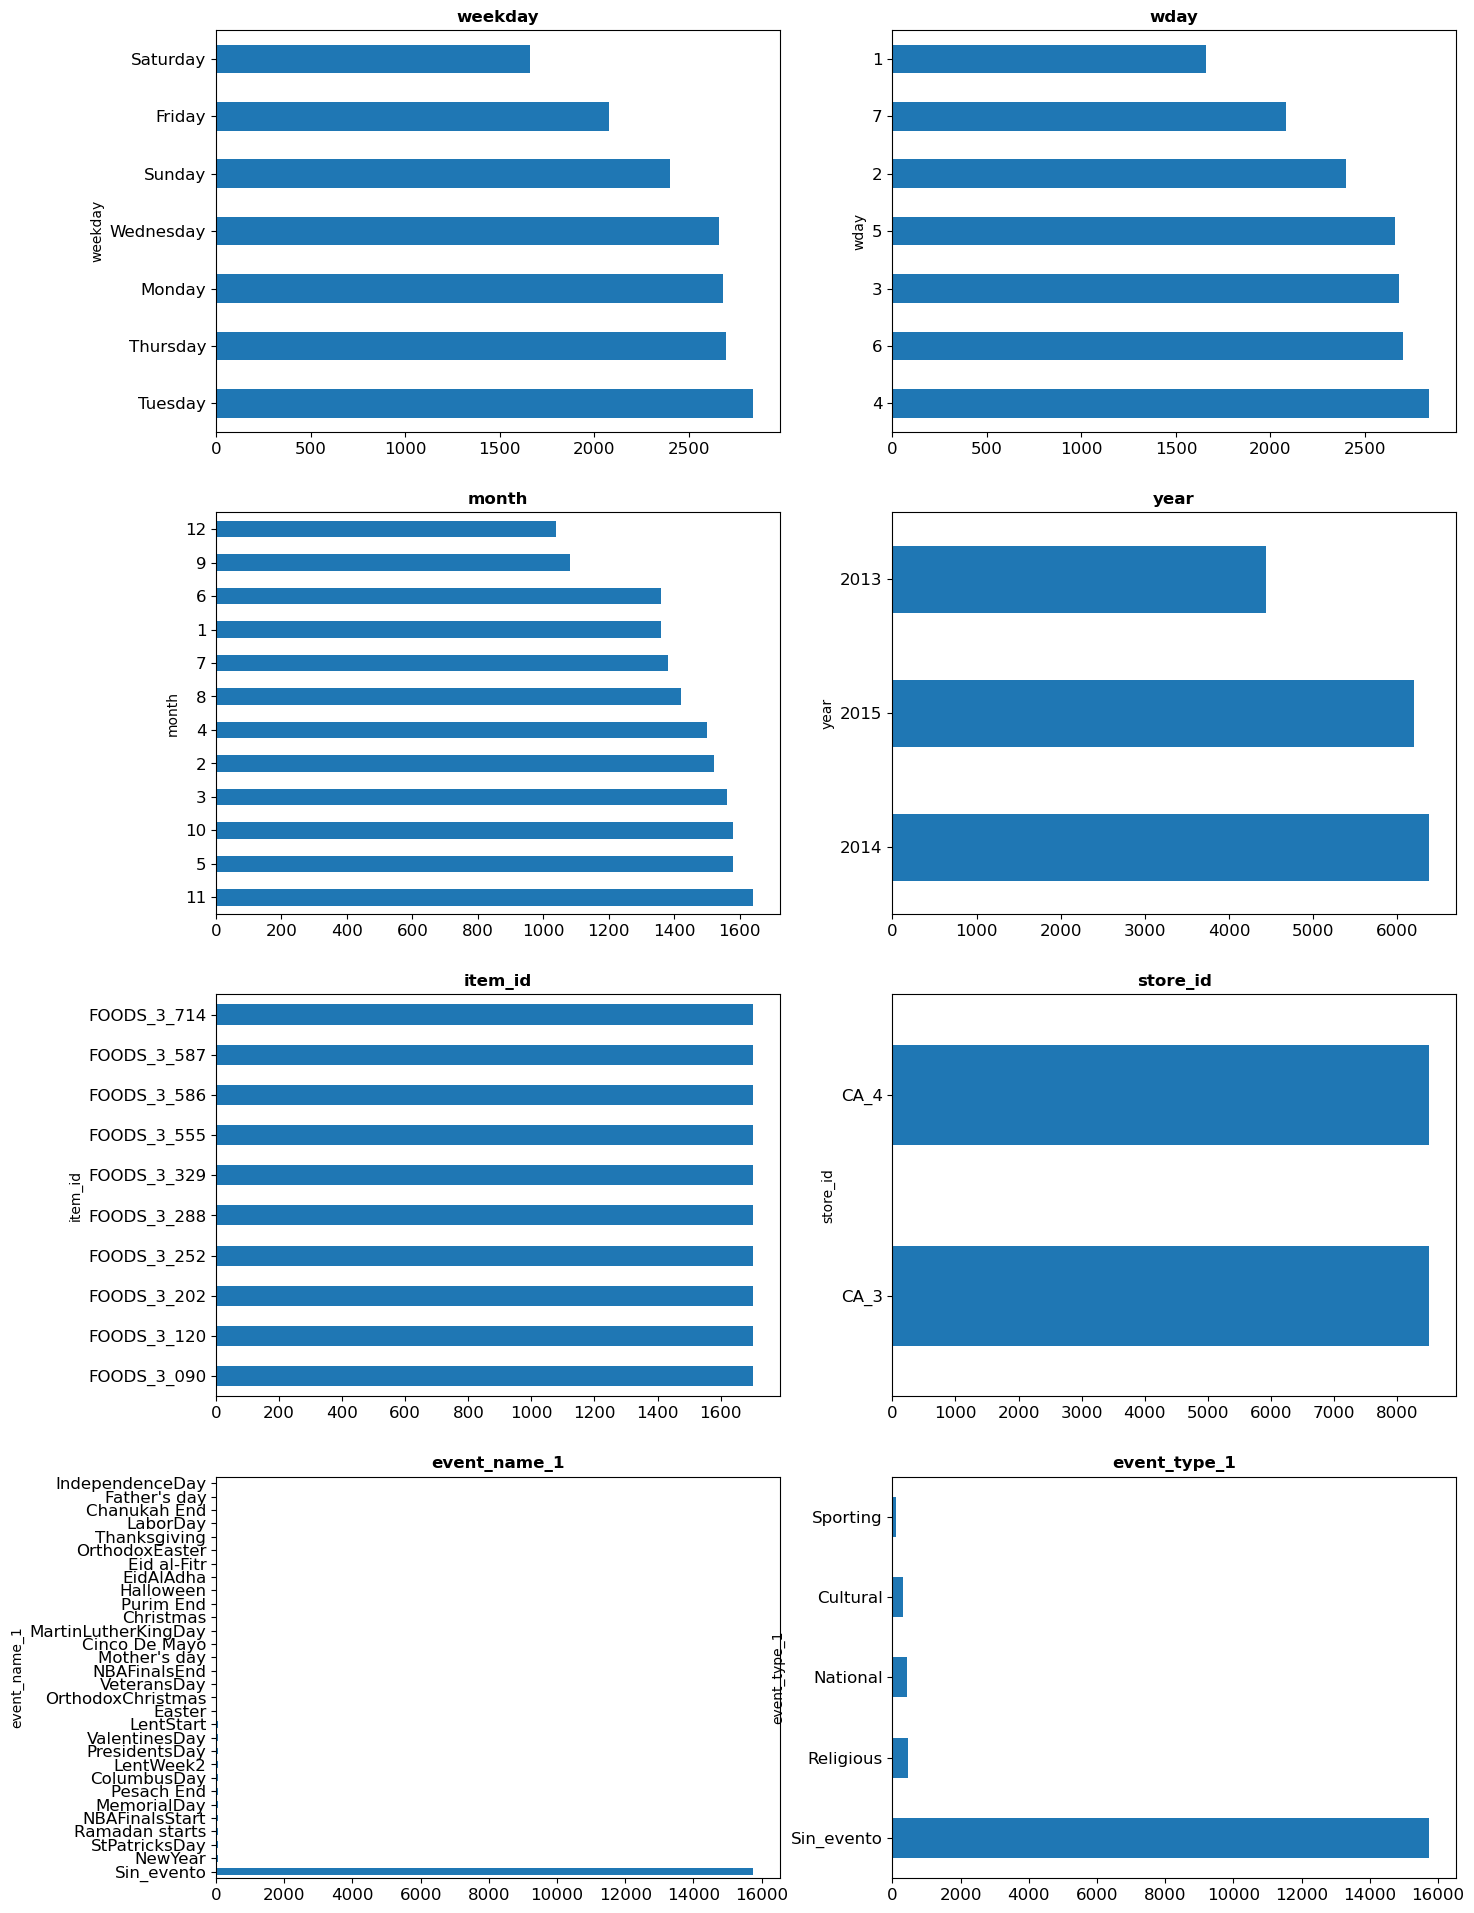

In [10]:
#Dejamos fuera del análisis la columna 'day_number'
graficos_eda_categoricos(cat[incluir])

## 4. EDA NUMÉRICAS

### 4.1. Análisis estadístico

In [11]:
def estadisticos_cont(num):
    #Calculamos describe
    estadisticos = num.describe().T
    #Añadimos la mediana
    estadisticos['median'] = num.median()
    #Reordenamos para que la mediana esté al lado de la media
    estadisticos = estadisticos.iloc[:,[0,1,8,2,3,4,5,6,7]]
    #Lo devolvemos
    return(estadisticos)

In [12]:
estadisticos_cont(num)

count          mean    median        std      min      25%  \
week_id     17020.0  11428.537015  11429.00  79.332781  11249.0  11347.0   
ventas      17020.0     26.603349     17.00  30.487154      0.0      6.0   
sell_price  17020.0      2.399868      1.68   1.236274      1.0      1.5   

                 50%       75%       max  
week_id     11429.00  11511.00  11544.00  
ventas         17.00     36.00    184.00  
sell_price      1.68      2.98      4.98

In [13]:
num.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17020 entries, 2013-01-01 to 2015-11-30
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   week_id     17020 non-null  int64  
 1   ventas      17020 non-null  int64  
 2   sell_price  17020 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 531.9+ KB


### 4.2. Análisis gráfico

En este caso el análisis gráfico que tiene más sentido es el de ventas y precios por diferentes dimensiones.

Así que primero necesitamos volver a unir los dos dataframes.

In [14]:
df = pd.concat([cat,num], axis=1)

df.head()

weekday wday month  year day_number      item_id store_id  \
date                                                                    
2013-01-01  Tuesday    4     1  2013      d_704  FOODS_3_090     CA_3   
2013-01-01  Tuesday    4     1  2013      d_704  FOODS_3_120     CA_3   
2013-01-01  Tuesday    4     1  2013      d_704  FOODS_3_202     CA_3   
2013-01-01  Tuesday    4     1  2013      d_704  FOODS_3_252     CA_3   
2013-01-01  Tuesday    4     1  2013      d_704  FOODS_3_288     CA_3   

           event_name_1 event_type_1  week_id  ventas  sell_price  
date                                                               
2013-01-01      NewYear     National    11249       0        1.25  
2013-01-01      NewYear     National    11249      33        1.25  
2013-01-01      NewYear     National    11249       0        4.98  
2013-01-01      NewYear     National    11249       0        4.98  
2013-01-01      NewYear     National    11249      20        4.28

#### 4.2.1. Tendencia global de las ventas

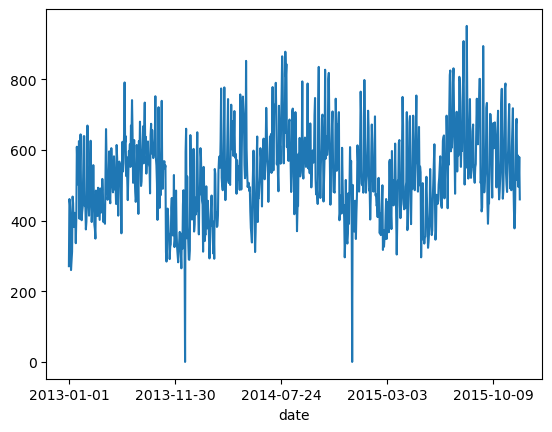

In [15]:
#Hacemos el análisis de todas las ventas globales sin filtrar nada para ver su tendencia
# - Vemos que hay una tendencia estable
# - Hay cierta estacionalidad con varias caidas de ventas
# - Hay 2 puntos de practicamente cero ventas 
df.groupby('date').ventas.sum().plot();

In [16]:
df.loc[df.item_id == 'FOODS_3_288'].groupby(['date','store_id']).ventas.sum().unstack()

store_id    CA_3  CA_4
date                  
2013-01-01    20    50
2013-01-15    14    44
2013-01-17    11    53
2013-01-22    18    71
2013-01-23    15    48
2013-01-24    19    54
2013-01-25    18    72
2013-01-28    31    49
2013-01-29    19    47
2013-01-30    18    44
2013-01-31     8    51
2013-02-04    29    56
2013-02-05    25    64
2013-02-06    28    61
2013-02-07    17    67
2013-02-09    27    89
2013-02-10    26    78
2013-02-11    25    69
2013-02-12    25    76
2013-02-13    26    94
2013-02-14    22    49
2013-02-15    23    64
2013-02-17    32    85
2013-02-18    33    58
2013-02-19    27    48
2013-02-20    20    64
2013-02-21    22    68
2013-02-22    46    56
2013-02-23    29    81
2013-02-24    31    72
2013-02-25    29    52
2013-02-26    22    39
2013-02-27    12    52
2013-02-28     9    55
2013-03-01     0    73
2013-03-03    51    84
2013-03-04    56    71
2013-03-05    40    77
2013-03-06    39    56
2013-03-07    45    58
2013-03-08    39    89
2013-03-10    42   121
2013-03-11    46    67
2013-03-12    33    57
2013-03-13    24    55
2013-03-14    38    57
2013-03-17    58    69
2013-03-18    37    67
2013-03-19    16    58
2013-03-20    24    60
2013-03-21    28    56
2013-03-24    36    66
2013-03-25    32    51
2013-03-26    23    66
2013-03-27    28    49
2013-03-28    21    78
2013-03-31    26    36
2013-04-01    41    62
2013-04-02    35    70
2013-04-03    28    75
2013-04-04    27    61
2013-04-08    30    44
2013-04-09    34    67
2013-04-10    21    68
2013-04-14    50    74
2013-04-15    37    59
2013-04-16    37    66
2013-04-17    30    47
2013-04-18    31    47
2013-04-19    28    69
2013-04-21    54    97
2013-04-22    56    96
2013-04-23    48    73
2013-04-24    32    60
2013-04-25    24    72
2013-04-26    34    59
2013-04-28    43    90
2013-04-29    24    48
2013-04-30    32    42
2013-05-02    28    71
2013-05-03    47    78
2013-05-05    48    60
2013-05-06    37    36
2013-05-07    34    53
2013-05-08    46    68
2013-05-09    46    87
2013-05-13    32    76
2013-05-14    34    80
2013-05-15    33    57
2013-05-16    24    63
2013-05-19    48    75
2013-05-20    32    83
2013-05-21    25    74
2013-05-22    24    45
2013-05-23    30    63
2013-05-24    29    79
2013-05-26    44    72
2013-05-27    33    66
2013-05-28    27    59
2013-05-29    20    44
2013-05-30    30    52
2013-05-31    32    81
2013-06-04    34   103
2013-06-05    55    55
2013-06-06    38    57
2013-06-09    52   100
2013-06-10    32    79
2013-06-11    47    73
2013-06-12    43    73
2013-06-13    35    62
2013-06-18    30    71
2013-06-19    20    56
2013-06-24    23    54
2013-06-25    18    67
2013-06-26    23    81
2013-06-27    27    75
2013-07-08    32    59
2013-07-09    31    91
2013-07-11    28    87
2013-07-14    56    84
2013-07-15    35    82
2013-07-16    37    65
2013-07-17    28    57
2013-07-18    35    78
2013-07-19    37    78
2013-07-22    40    63
2013-07-23    32    50
2013-07-24    26    56
2013-07-28    39    78
2013-07-29    50    69
2013-07-30    32    47
2013-07-31    22    44
2013-08-01    38    79
2013-08-02    41    72
2013-08-04    53    82
2013-08-05    55    91
2013-08-06    46    68
2013-08-07    47    80
2013-08-08    41    93
2013-08-12     0    87
2013-08-13    47   116
2013-08-14    46    82
2013-08-15    43    99
2013-08-16    56    95
2013-08-17    55   109
2013-08-18    53   118
2013-08-19    28    94
2013-08-20    43    84
2013-09-28    15    76
2013-09-29    35    93
2013-09-30    18    54
2013-10-01    29    61
2013-10-02    16    57
2013-10-03    31    90
2013-10-07    31    66
2013-10-08    25    73
2013-10-09    16    86
2013-10-10    27    78
2013-10-11    32    77
2013-10-14    21    64
2013-10-15    28    78
2013-10-16    31    74
2013-10-17    16    73
2013-10-19    24    91
2013-10-21    26    70
2013-10-22    23    57
2013-10-23    24    52
2013-10-24    12    48
2013-10-25    21    75
2013-10-26    26    83
2013-10-27    33    75
2013-10-29    13    5

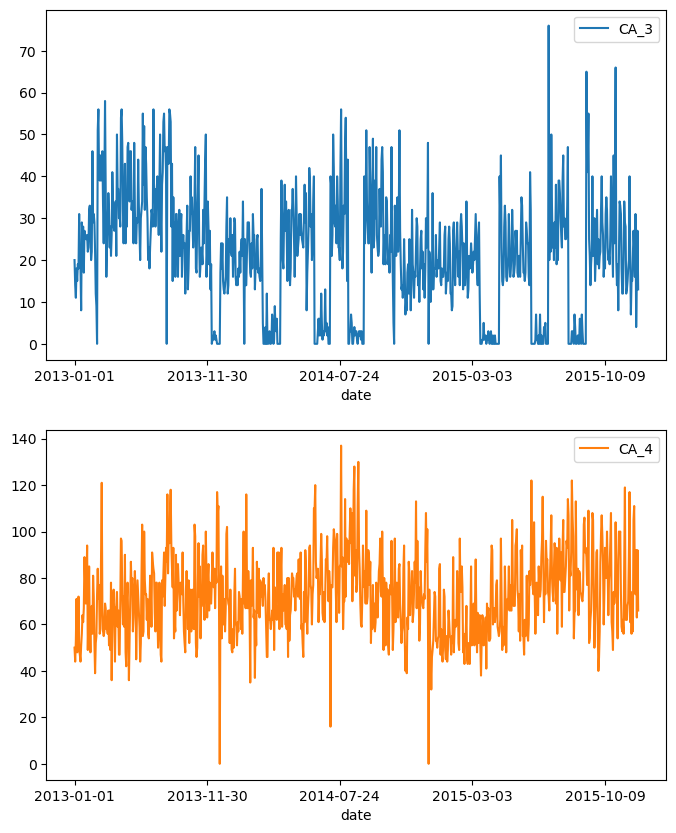

In [17]:
df.loc[df.item_id == 'FOODS_3_288'].groupby(['date','store_id']).ventas.sum().unstack()\
    .plot(subplots = True,  layout = (2,1), sharex=False, figsize=(8,10));

#### 4.2.2. Tendencia de las ventas por producto

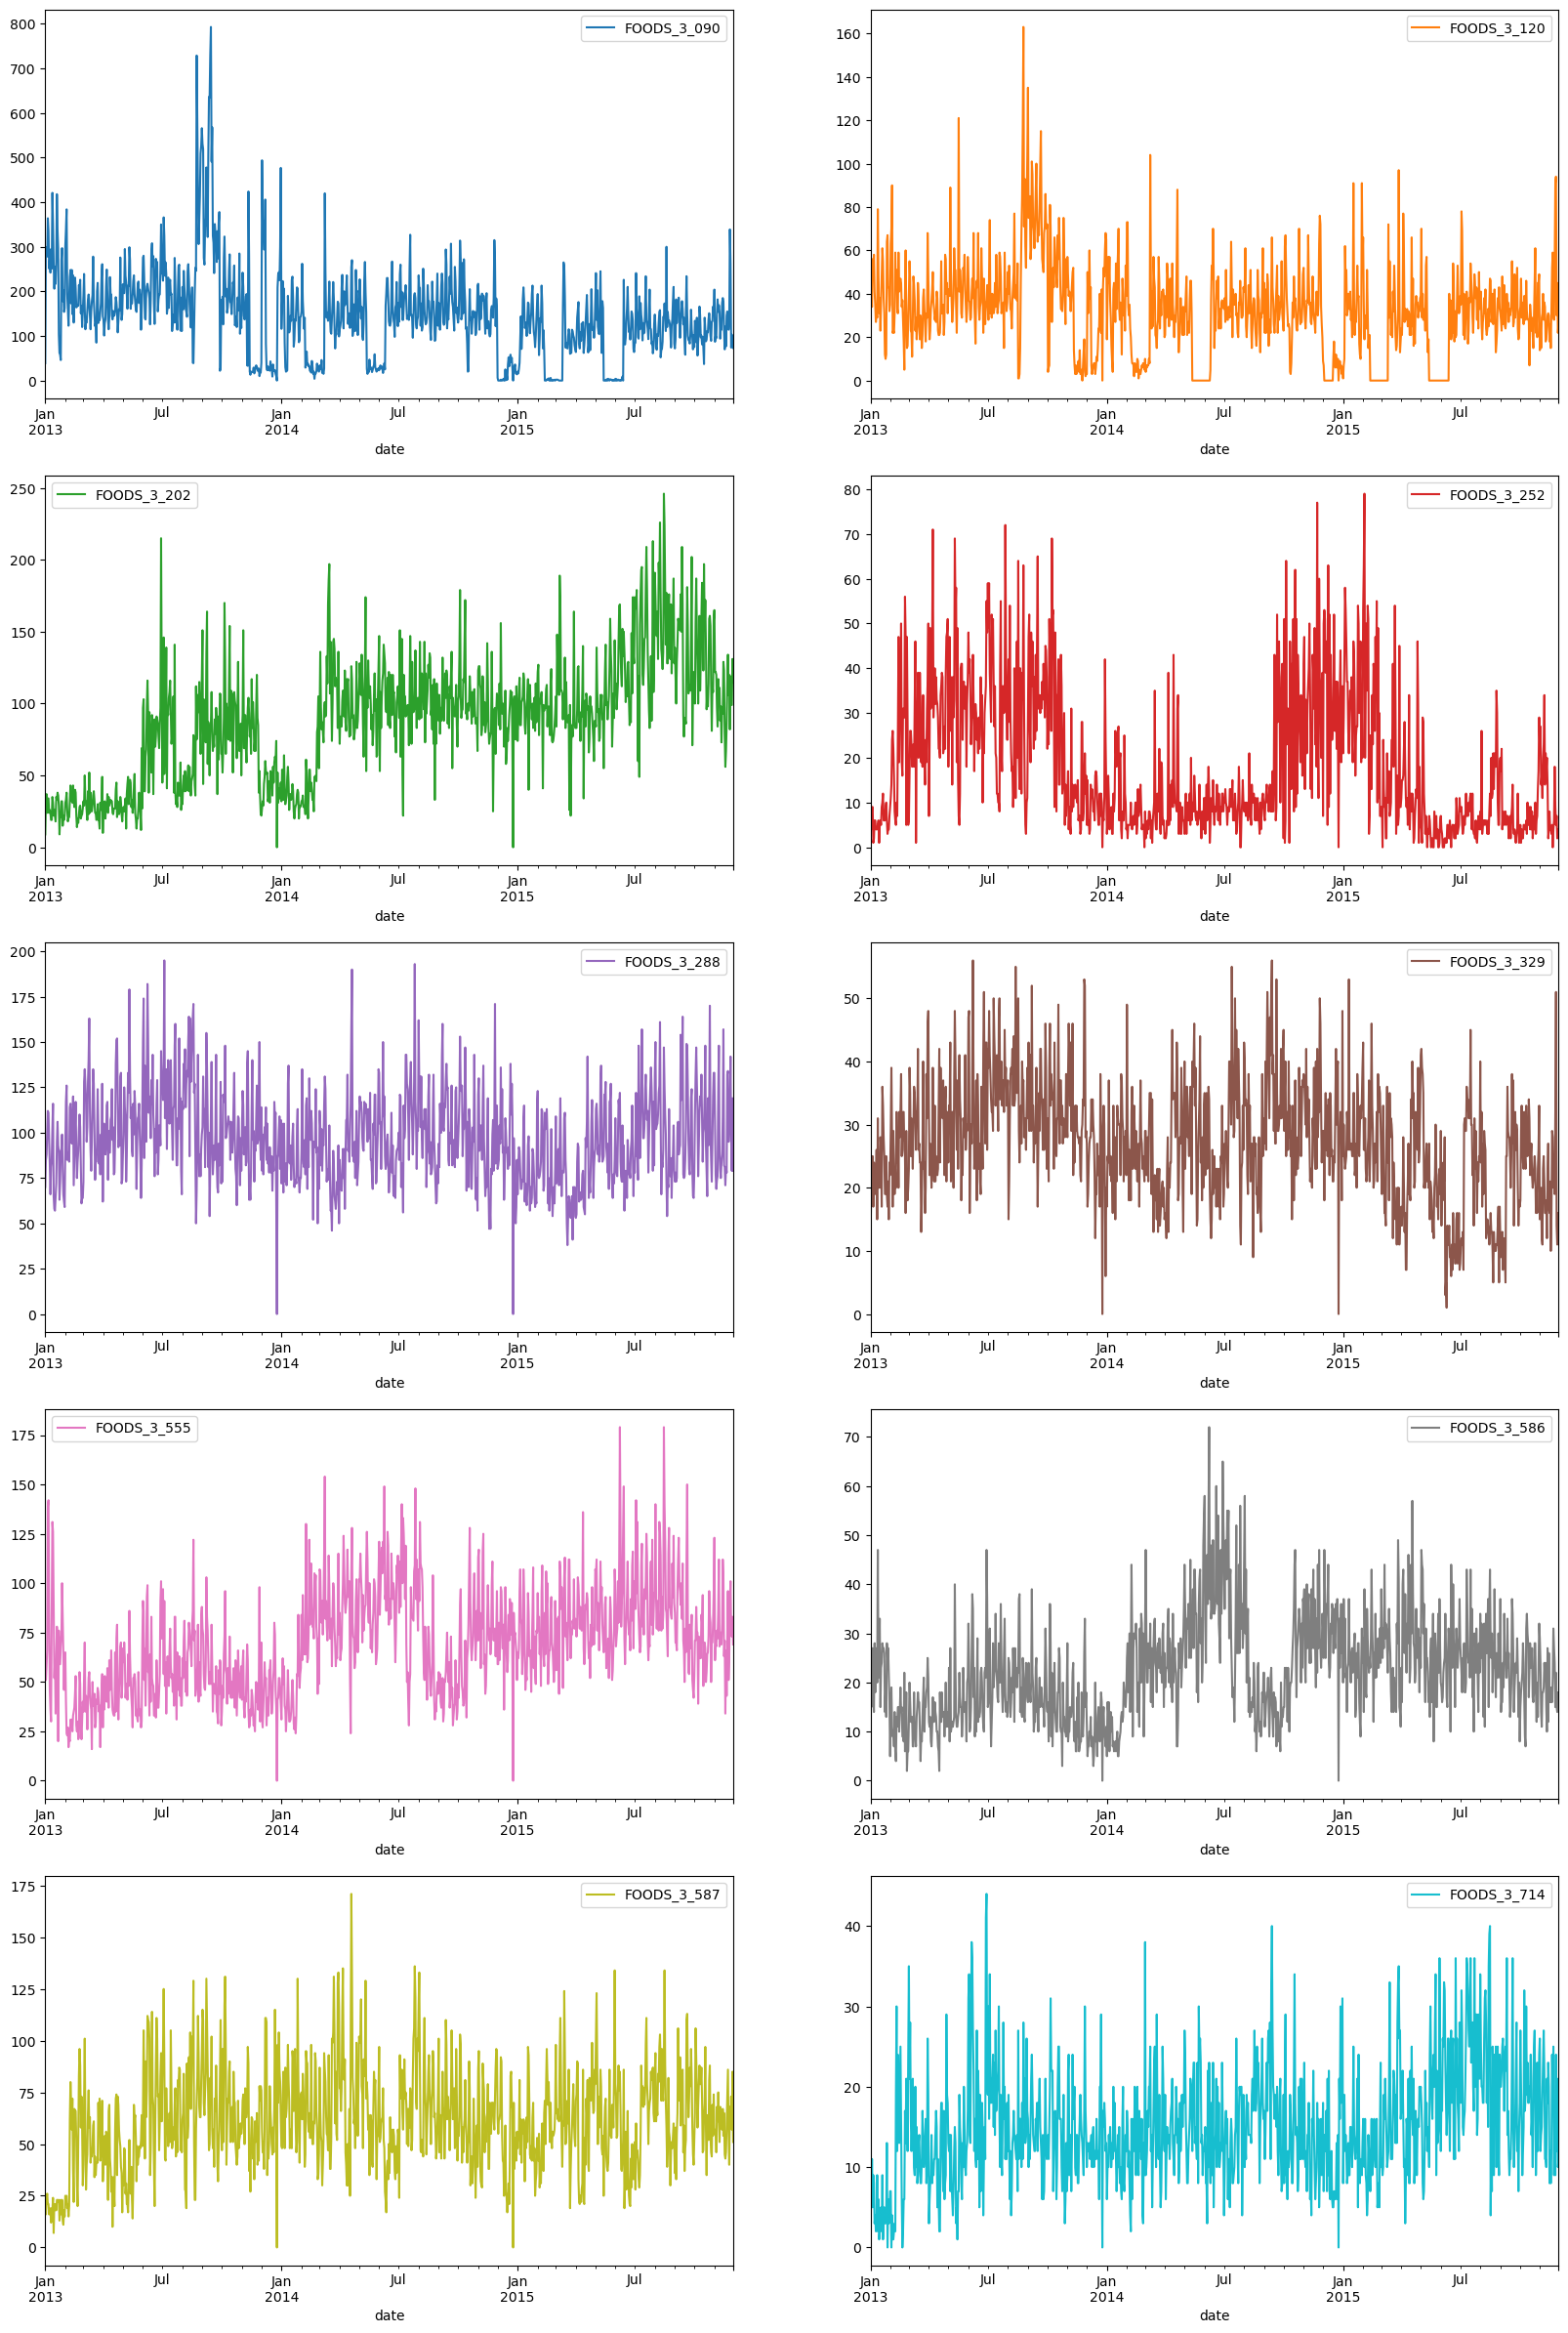

In [22]:
#Después hacemos el análisis de cada uno de los productos desagregados para ver la información de cada uno
df.groupby(['date','item_id']).ventas.sum().unstack().plot(subplots = True,  layout = (5,2), sharex=False, figsize=(20,30));

#### 4.2.3. Tendencia de las ventas por tienda y producto

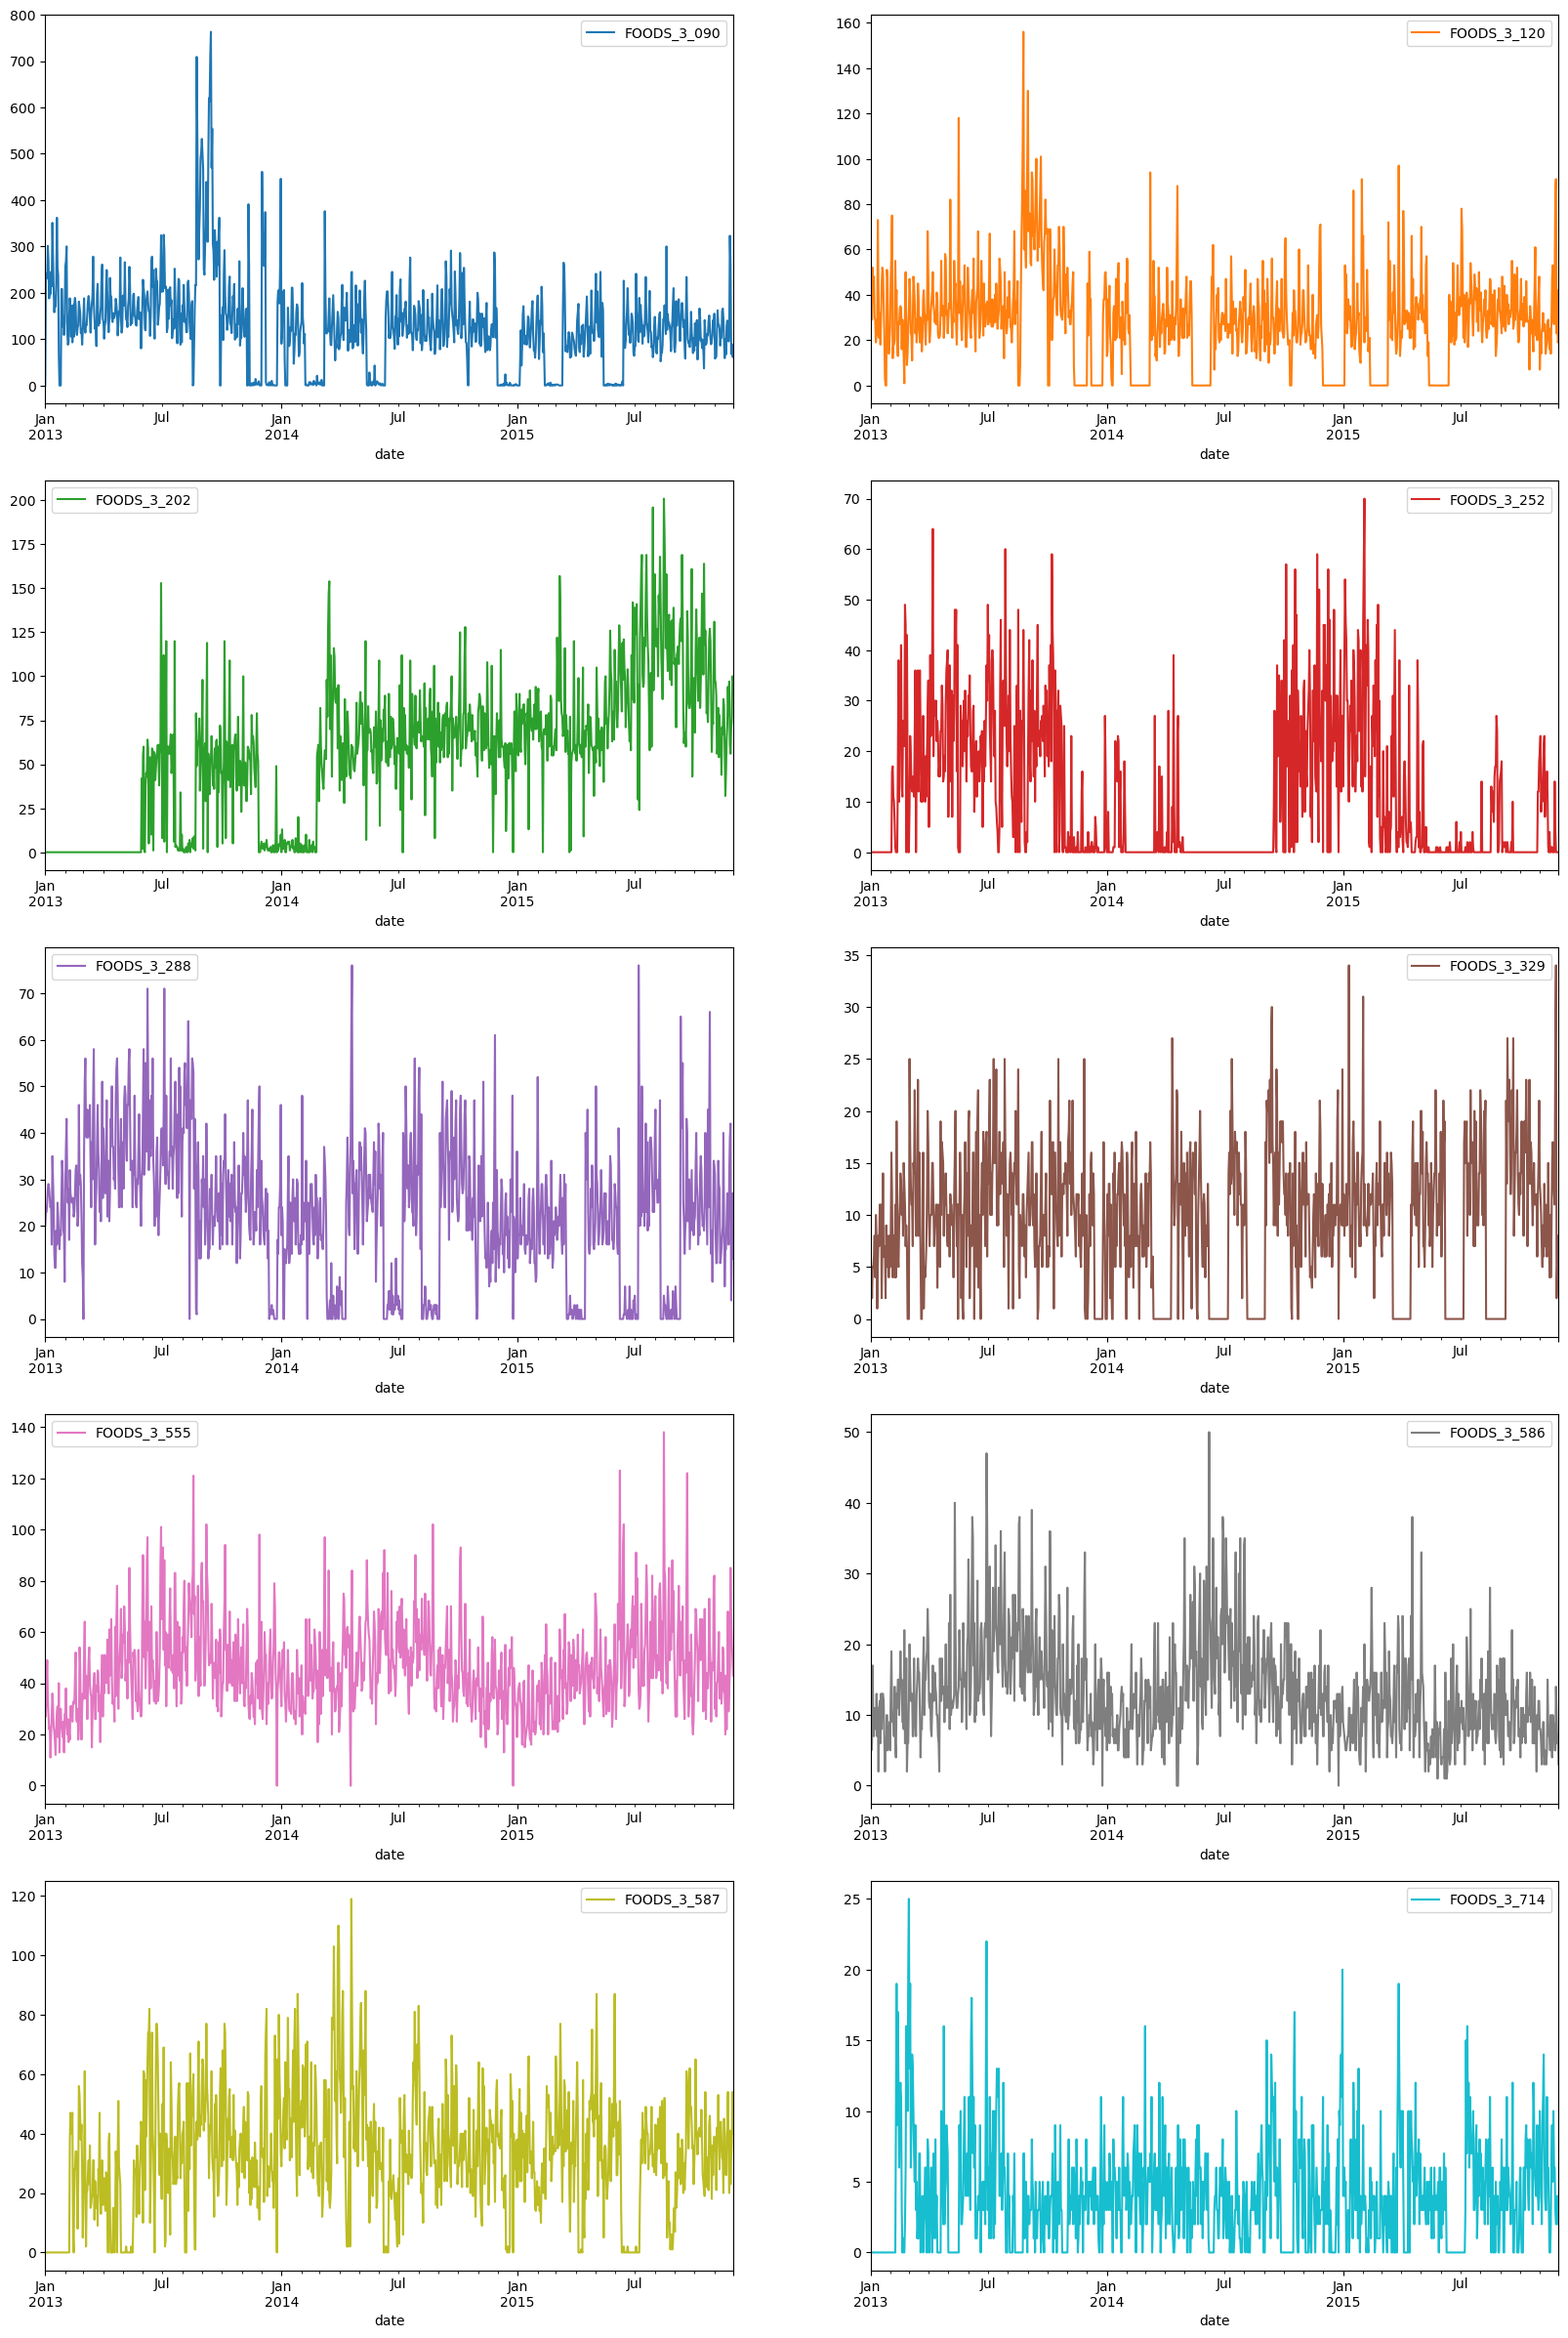

In [23]:
#Ventas intermitentez en varios productos que se ven por haber zonas de planos en cero
#Habra que ir desagregando cada producto para ver las cosas raras como el plano del producto 202. Ahi nos vamos al gráfico
#de producto de ambas tiendas y vemos que si hay ventas. La empresa si tenia stock, pero puede que solo en la otra tienda
df.loc[df.store_id == 'CA_3'].groupby(['date','item_id']).ventas.sum().unstack()\
    .plot(subplots = True,  layout = (5,2), sharex=False, figsize=(20,30));

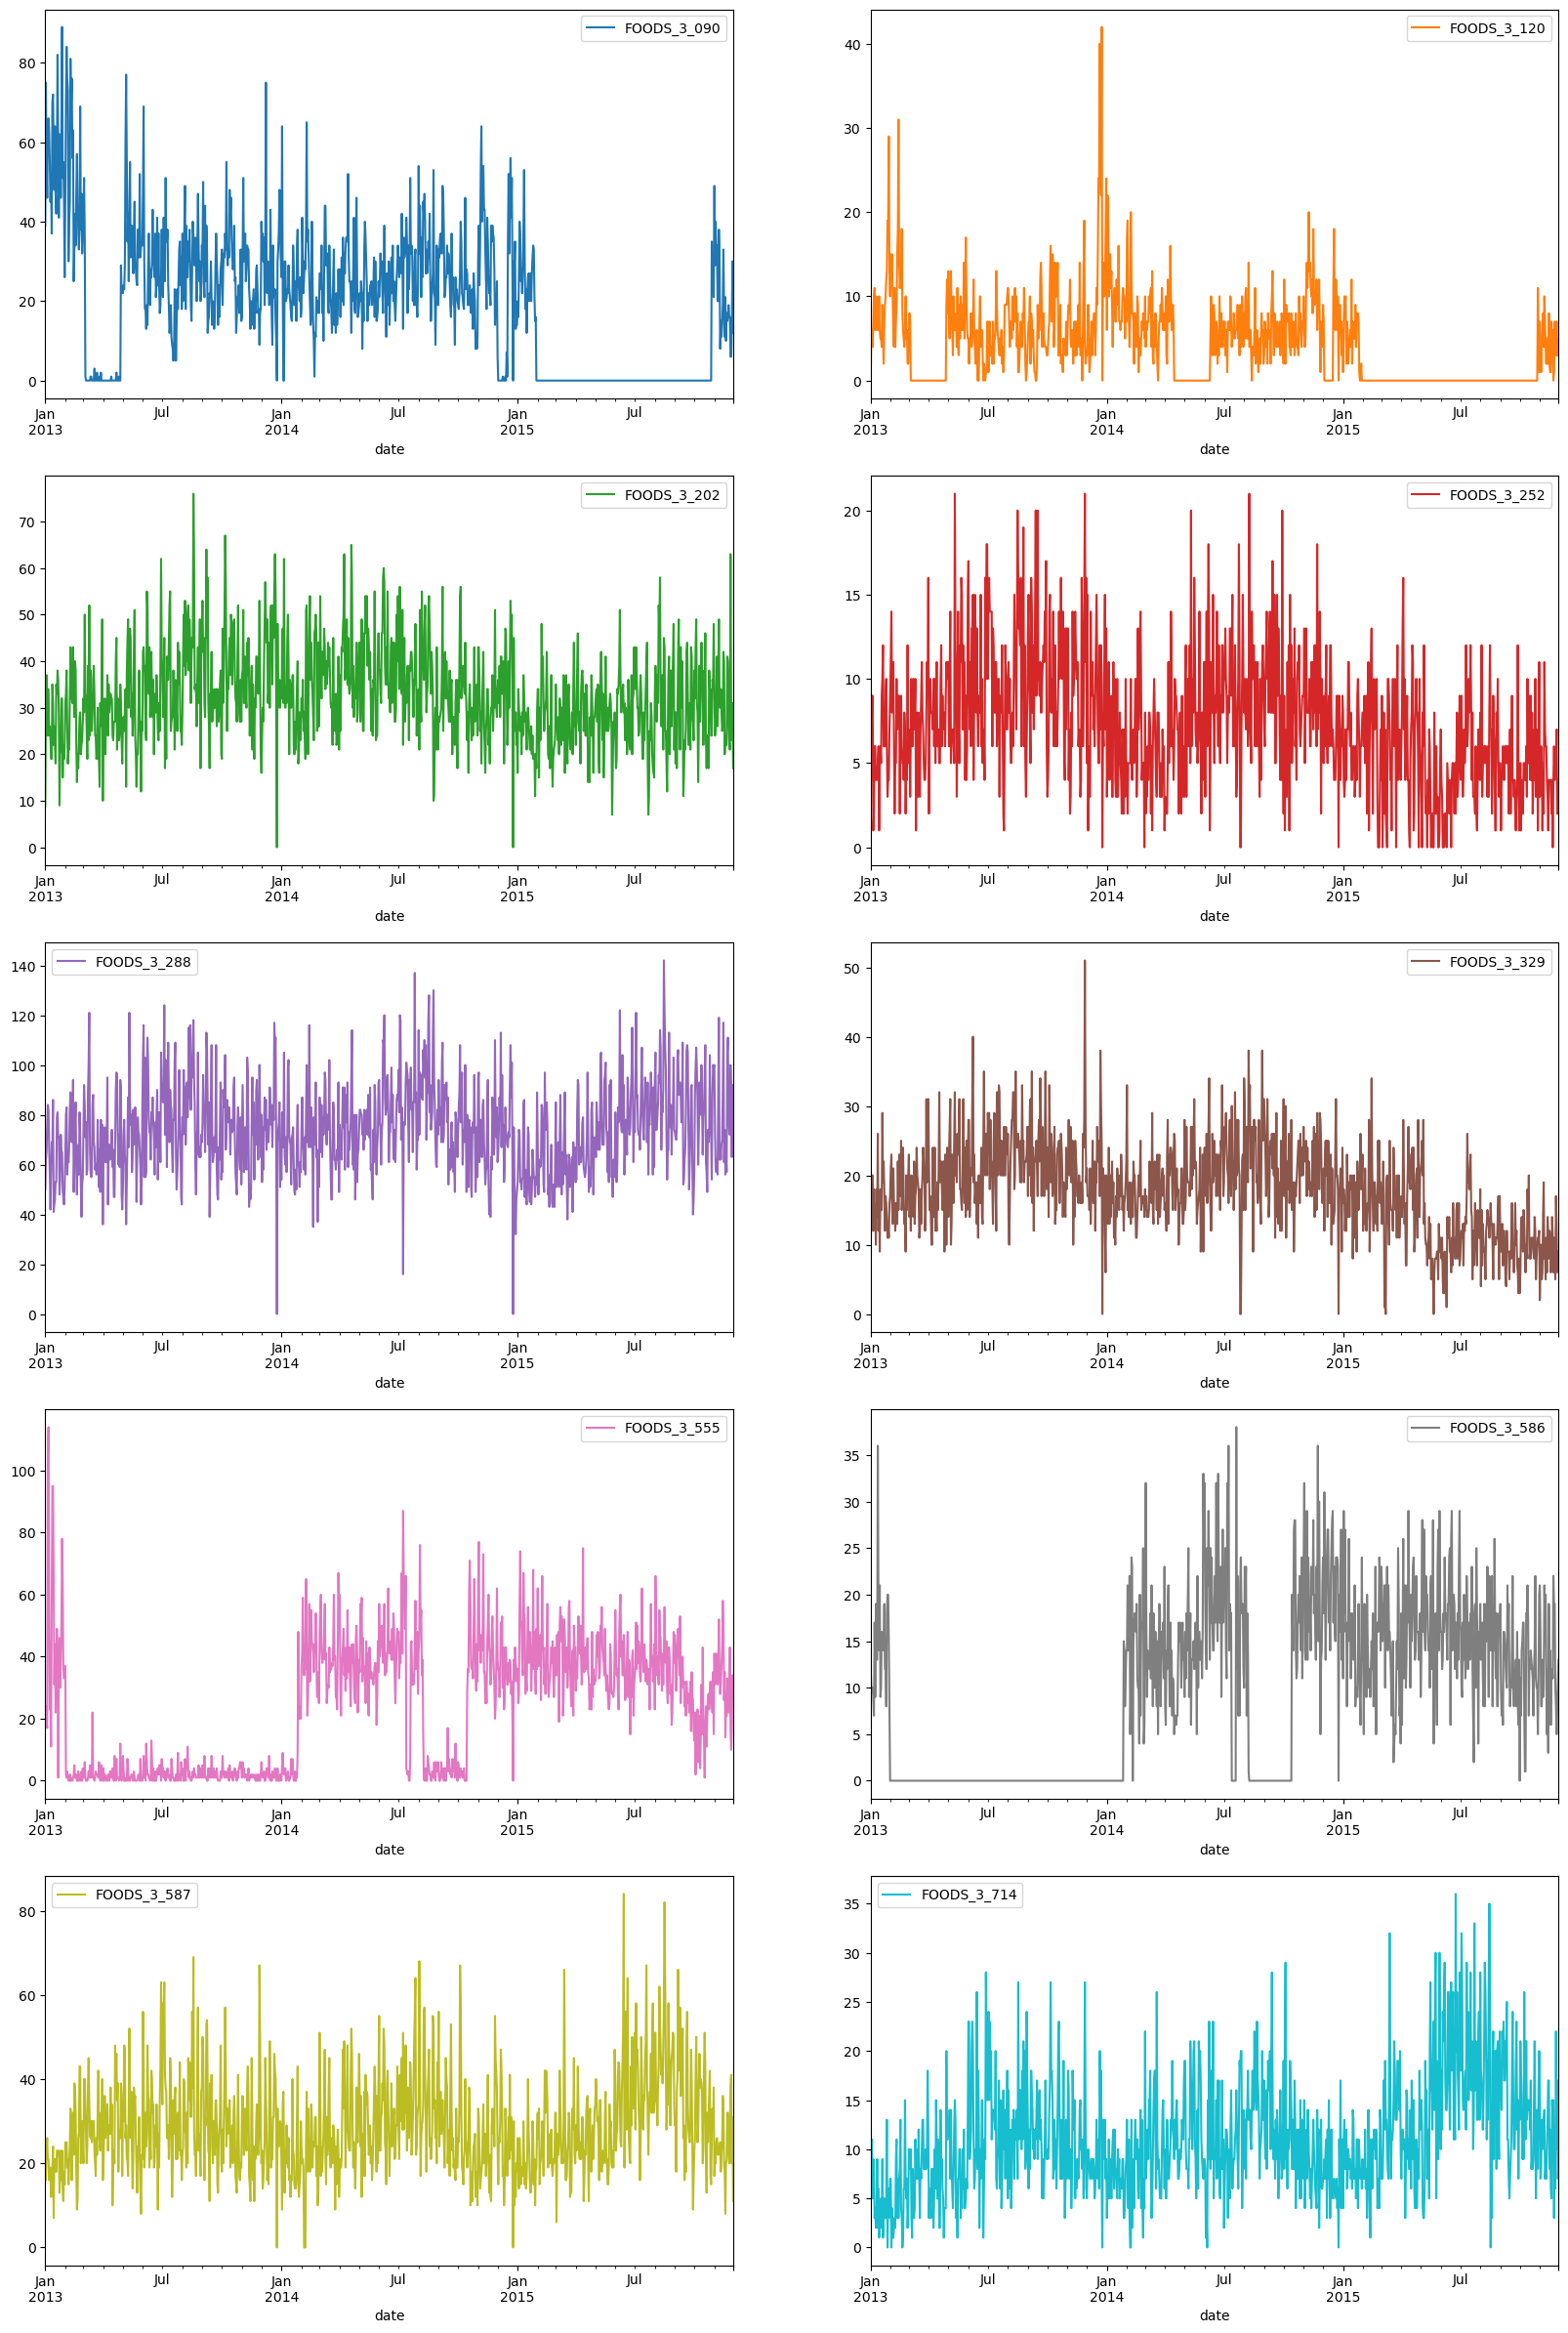

In [24]:
df.loc[df.store_id == 'CA_4'].groupby(['date','item_id']).ventas.sum().unstack().plot(subplots = True,  layout = (5,2), sharex=False, figsize=(20,30));

Conclusiones:

* Estructura jerárquica
* Hay productos nuevos a nivel de tienda
* Aunque no a nivel general, por lo que podríamos pensar que no son realmente productos nuevos si no demanda intermitente
* Hay demanda intermitente
    * No sabemos la causa: falta de demanda, retirada del mercado o rotura de stock

Acciones:

* Modelizar a nivel tienda producto
* Crear una variable que capture el efecto de la demanda intermitente
* Utilizar algoritmos basados en árboles y rápidos: XGBoost o lightGBM

Estrategias para el forecasting jerárquico (CATEGORÍA - SUBCATEGORÍA - PRODUCTO)

* BOTTON-UP: Modelizamos por producto y después agregamos los datos para tener los datos de subcategorías y categorías
    * PROS: Sencilla de hacer
    * CONTRAS: Menor capacidad predictiva que TOP DOWN porque al agregar información se pierde la exactitud de la predicción
* TOP DOWN:
    
      1.Modelizamos a nivel categoría y a nivel subcategoría
      2. El dato válido de predicción es el de categoría y usamos la predicción de subcategoría para saber el % de cada subcategoría que corresponde en la categoría
      Ej. Prediccion categoría=1000, predicción subcategoría=1500 (con tres subcategorías=500 cada una). Esto me da que el 33% de los 1000 de predicción de la categoría corresponde a cada categoría y así clasificaríamos las ventas
    * PROS: Minimizas el error de la predicción total
    * CONTRAS:

* HÍBRIDA: Tiene sentido cuando hay mas de 3 niveles jerárquicos pero usaremos los 3 niveles de nuestro caso para explicarlo
    
      1. Modelizamos TOP DOWN desde SUBCATEGORÍA para conseguir PRODUCTO 
      2. Modelizamos BOTTON-UP desde SUBCATEGORÍA para conseguir CATEGORÍA 
    * PROS: Repartes el error
    * CONTRAS: Mayor trabajo porque hay que hacer mas modelos y predicciones

#### 4.2.4. Tendencia del precio por producto

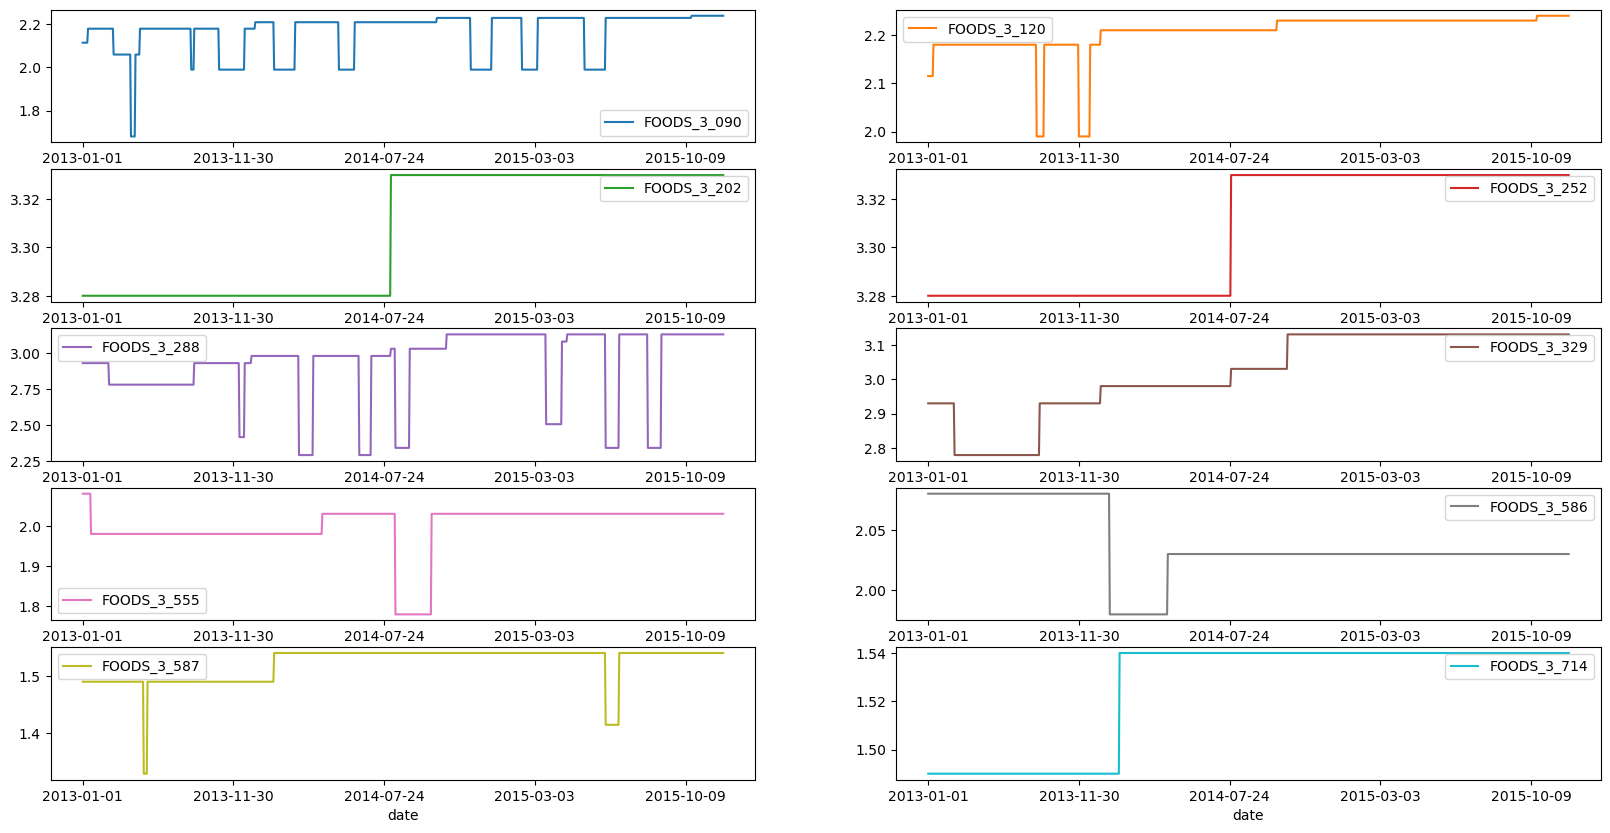

In [19]:
df.groupby(['date','item_id']).sell_price.mean().unstack()\
    .plot(subplots = True,  layout = (5,2), sharex=False, figsize=(20,10));

Conclusiones:

* Las políticas de precio varían mucho por producto
* Parece que las promociones son frecuentes
* Sería muy útil disponer de un calendario de promociones

#### 4.2.5. Estacionalidad por producto

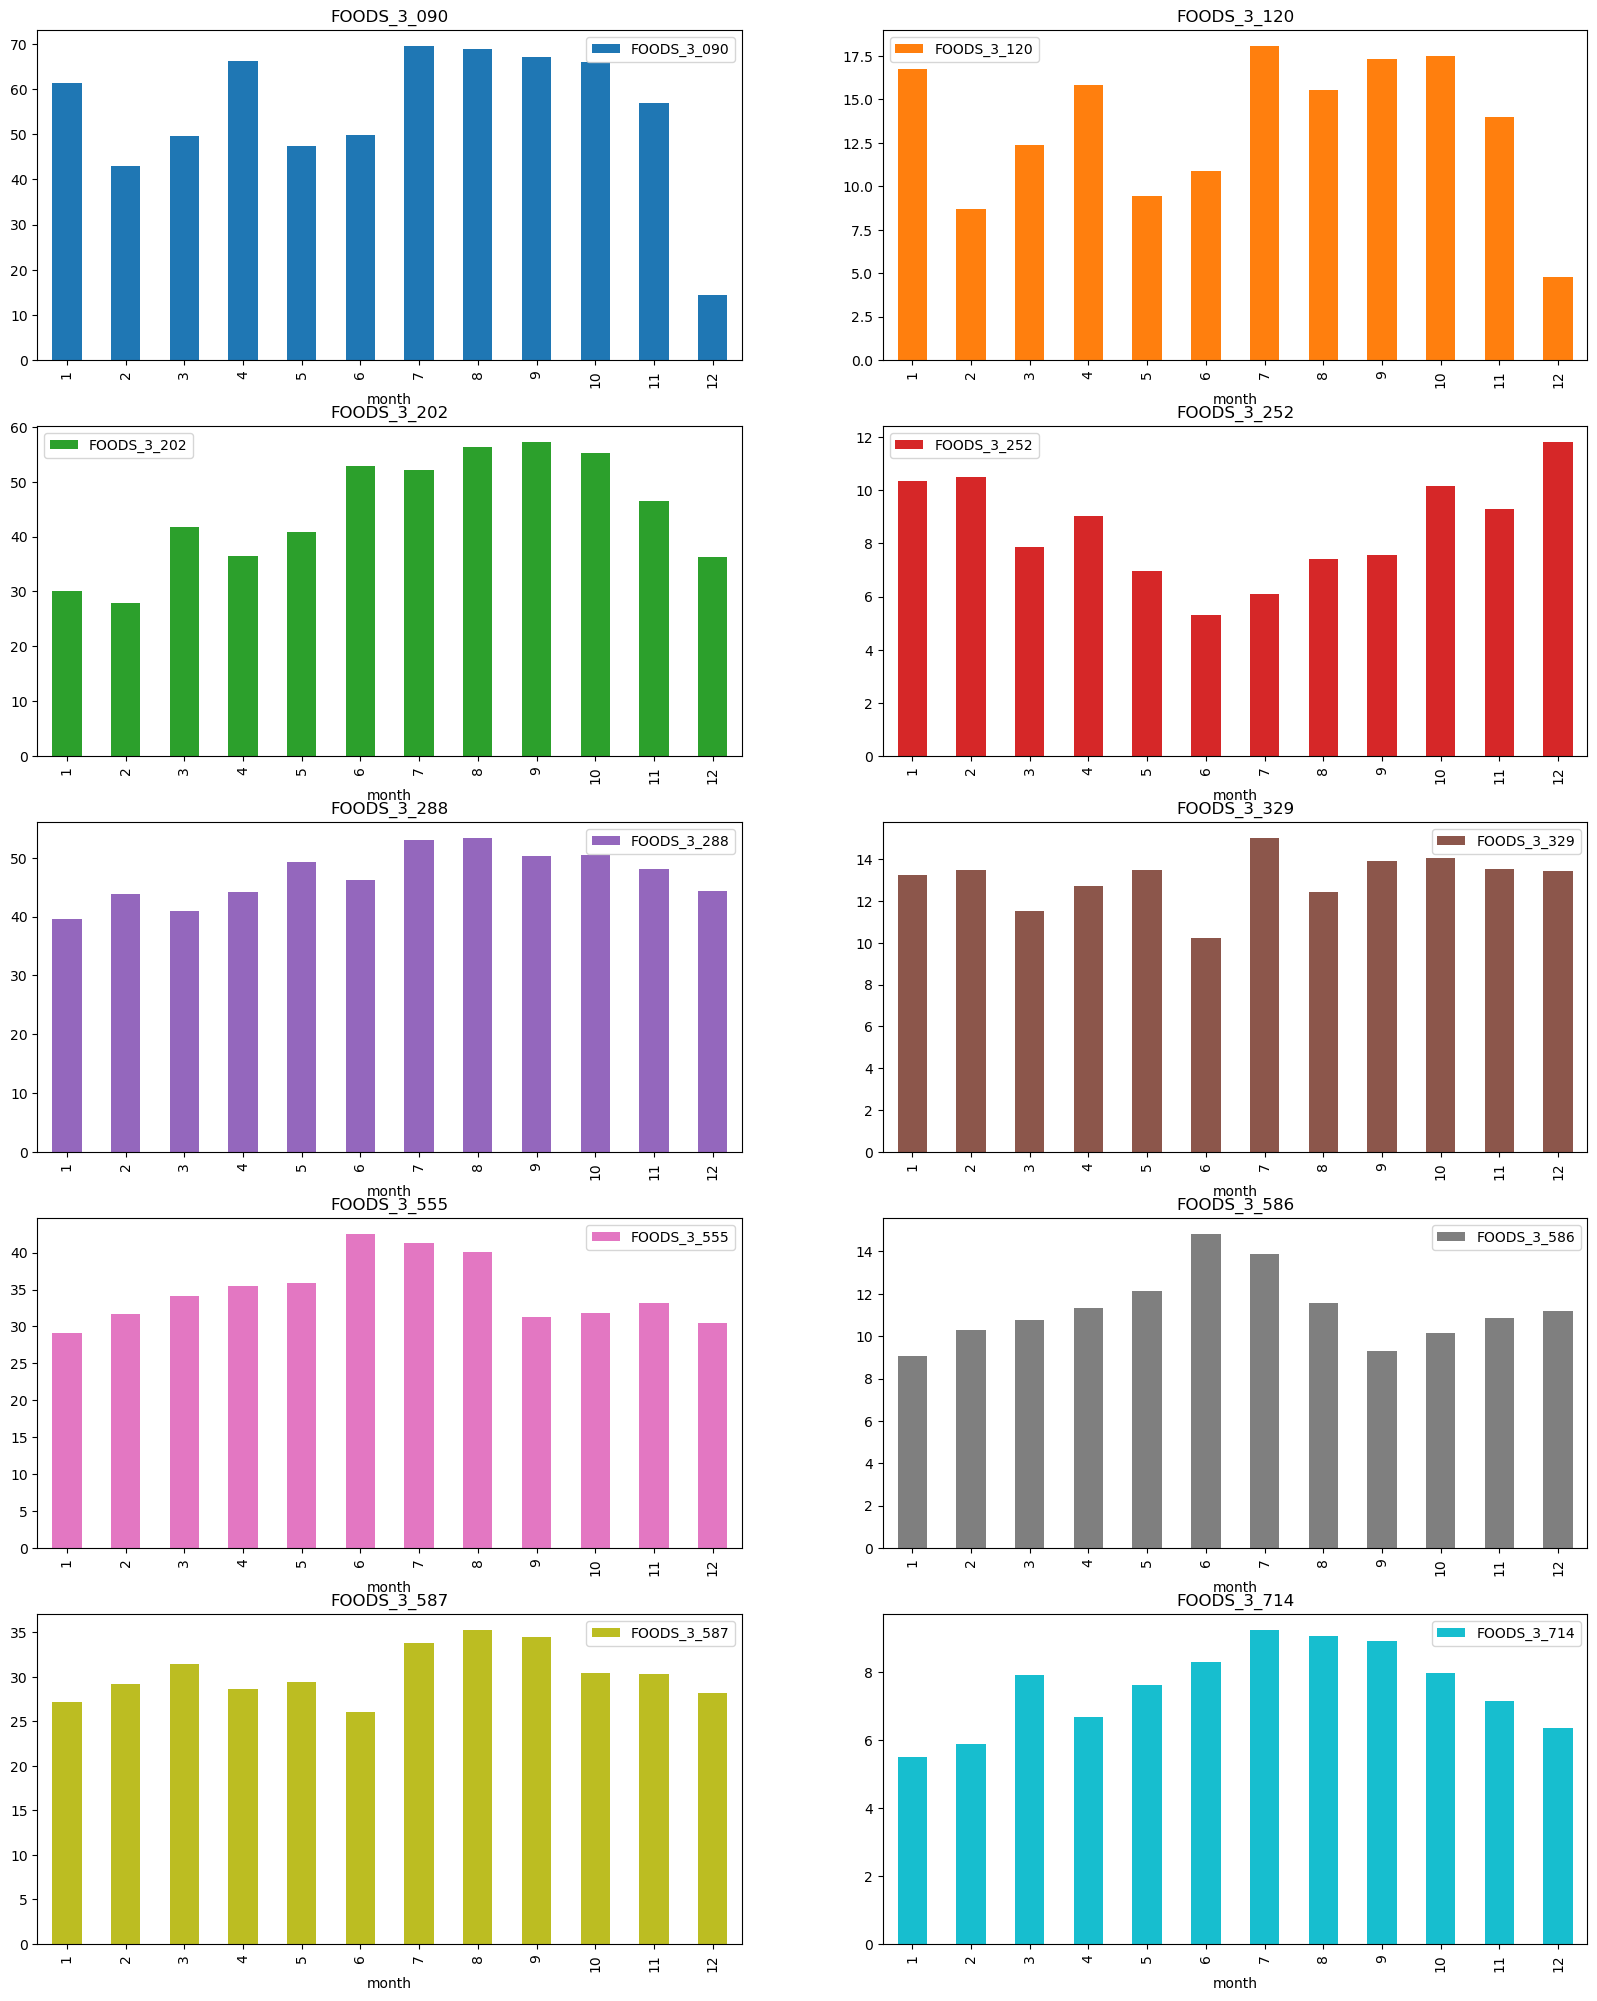

In [20]:
df.groupby(['month','item_id']).ventas.mean().unstack().plot.bar(subplots = True,  layout = (6,2), sharex=False, figsize=(20,30));

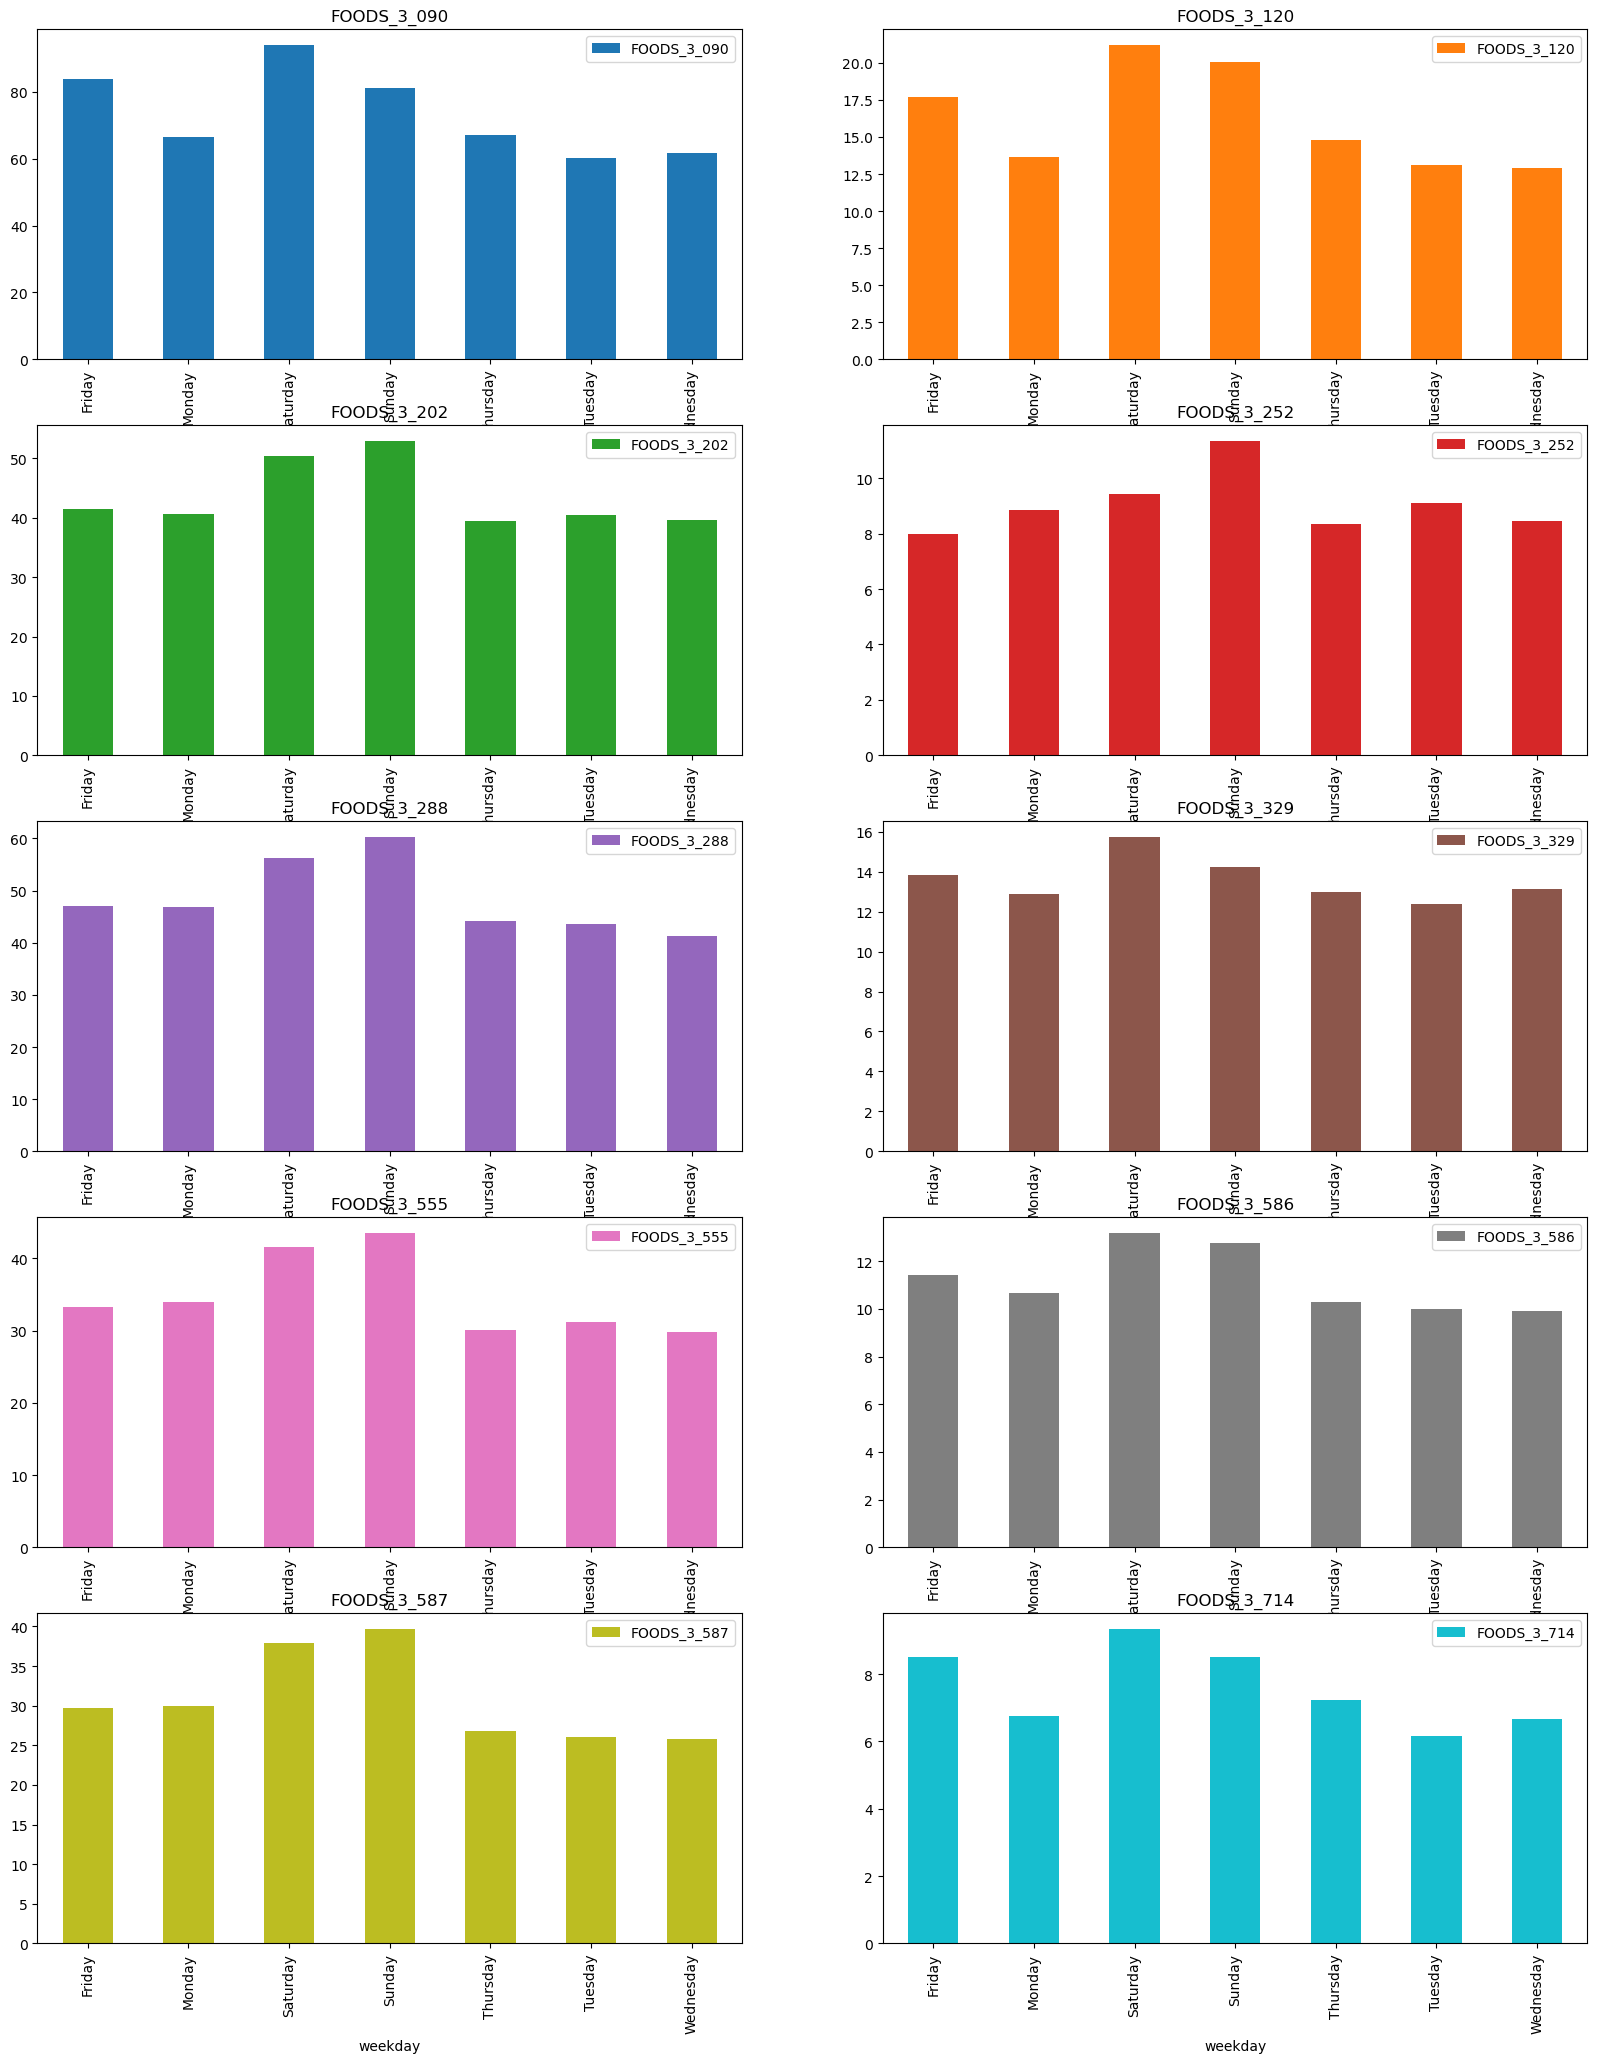

In [27]:
df.groupby(['weekday','item_id']).ventas.mean().unstack().plot.bar(subplots = True,  layout = (6,2), sharex=False, figsize=(20,30));

#### 4.2.6. Estacionalidad por evento

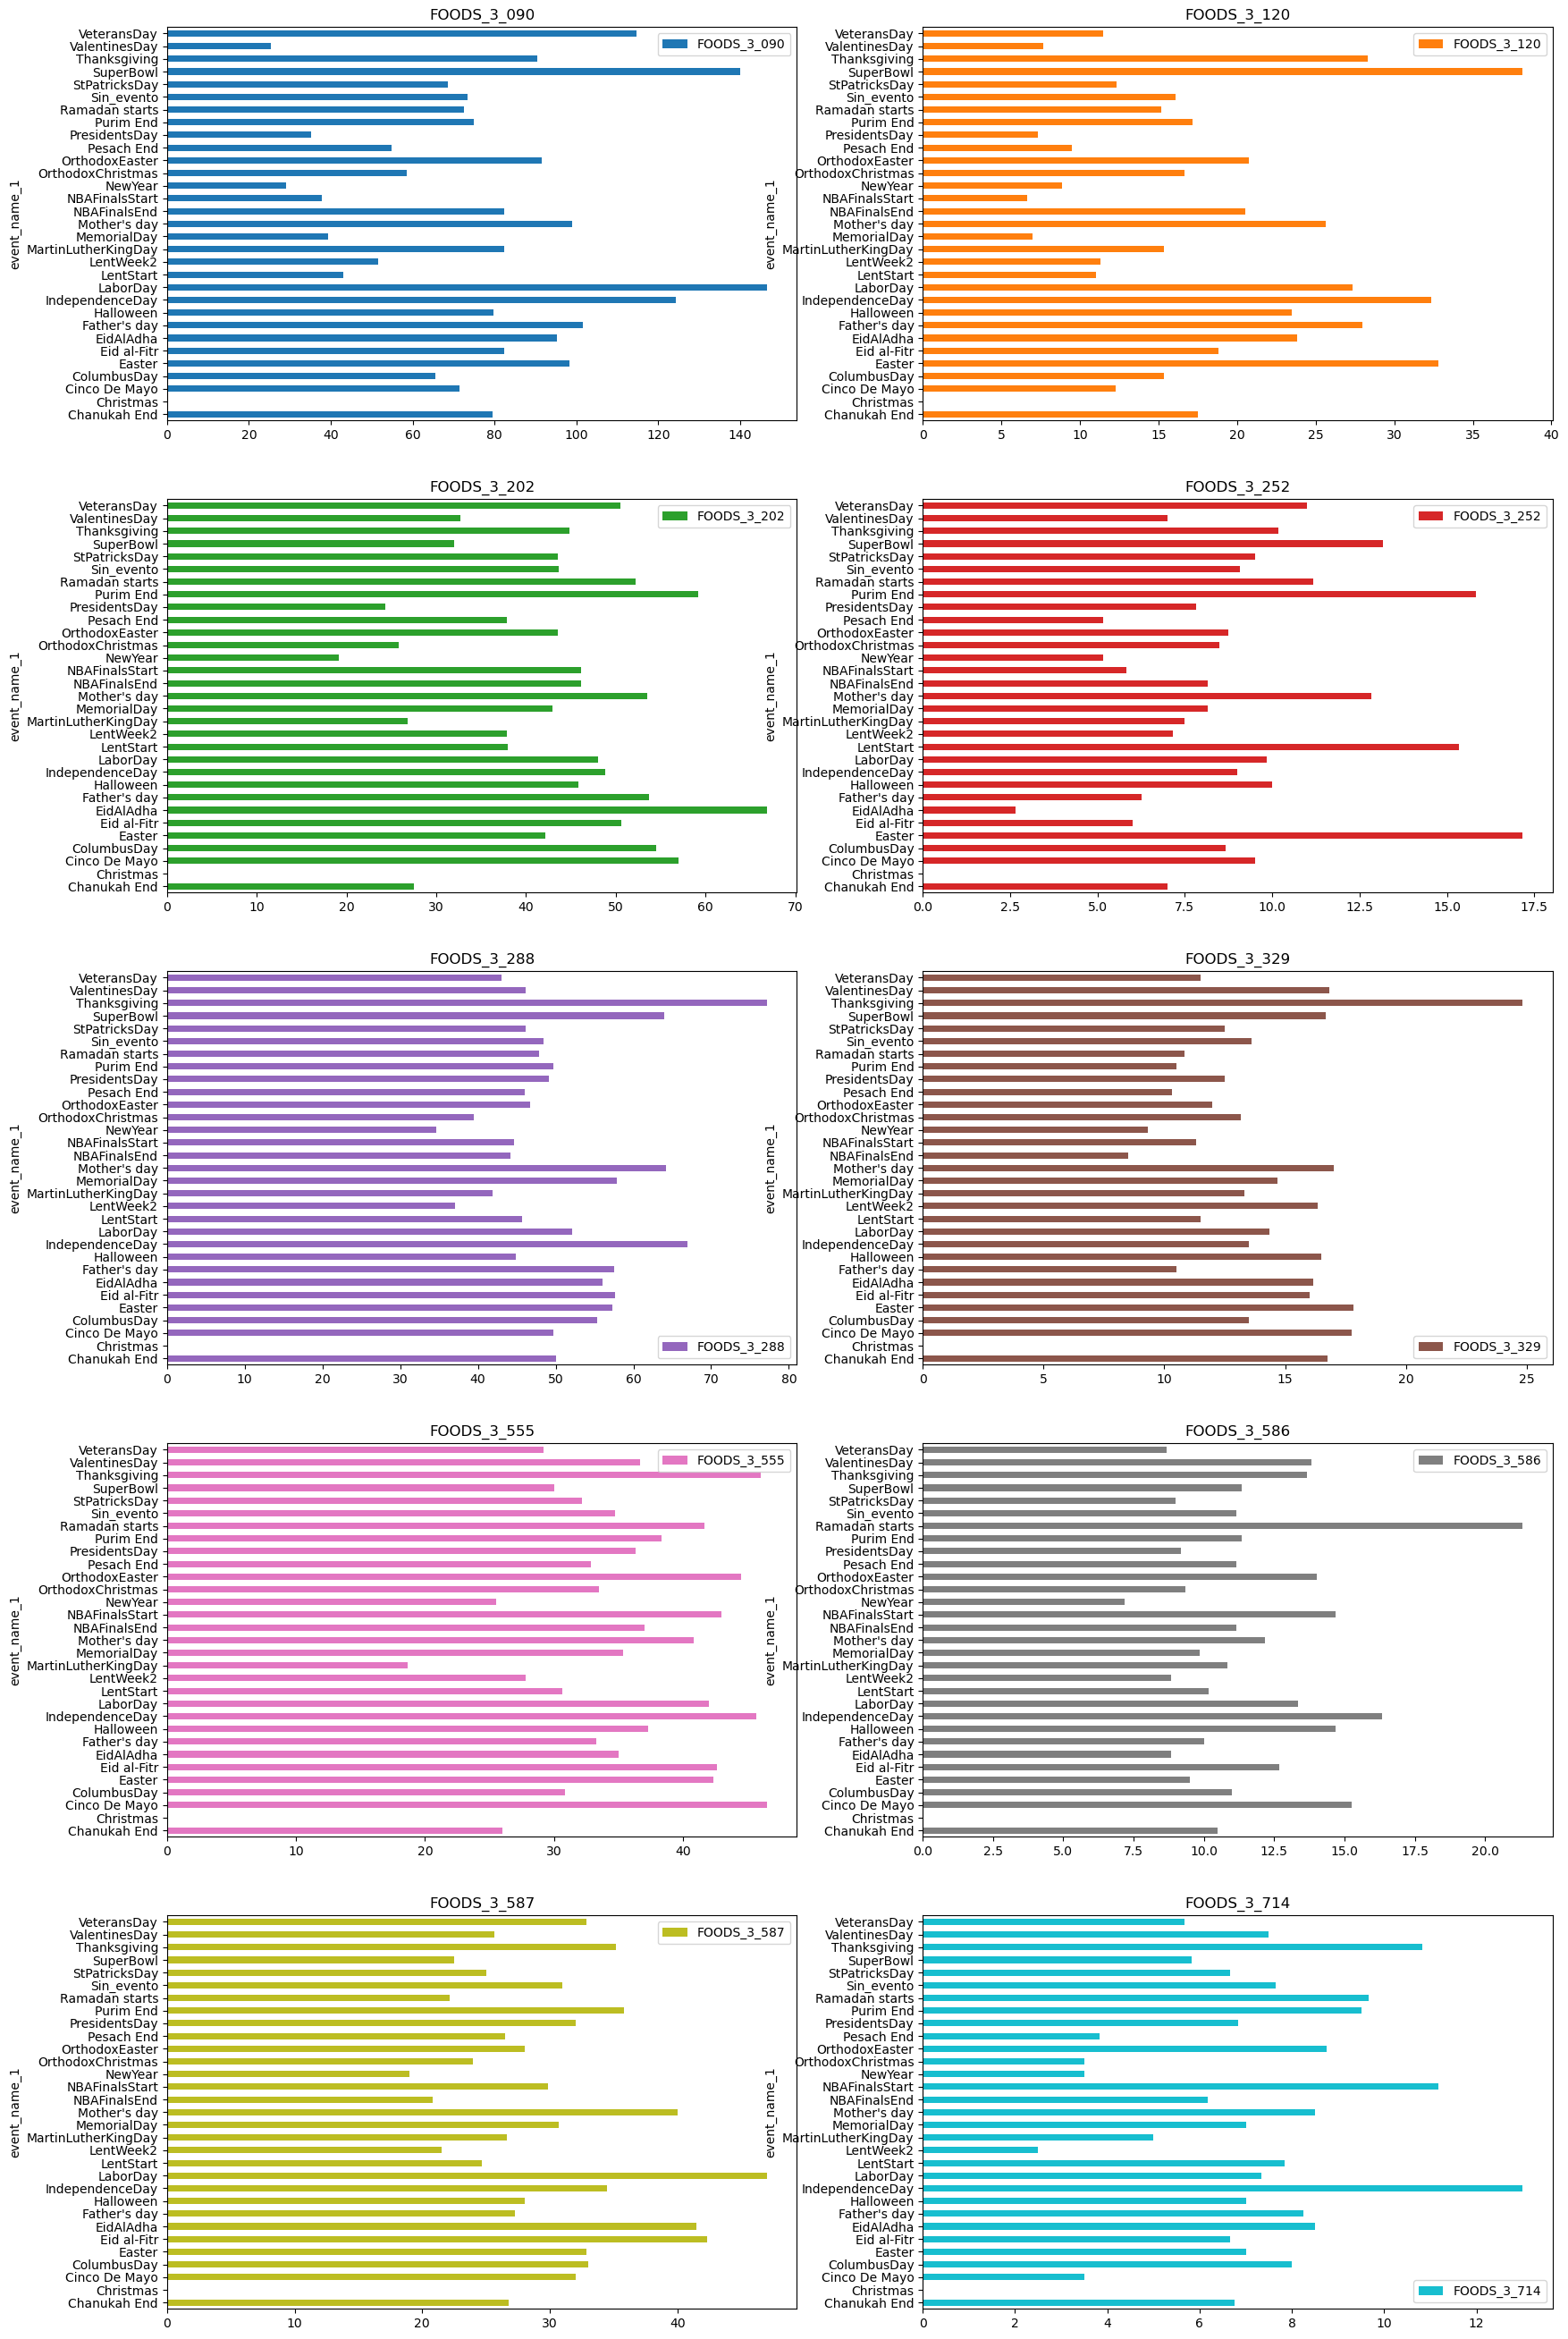

In [28]:
df.groupby(['event_name_1','item_id']).ventas.mean().unstack().plot.barh(subplots = True,  layout = (6,2), sharex=False, figsize=(20,40));

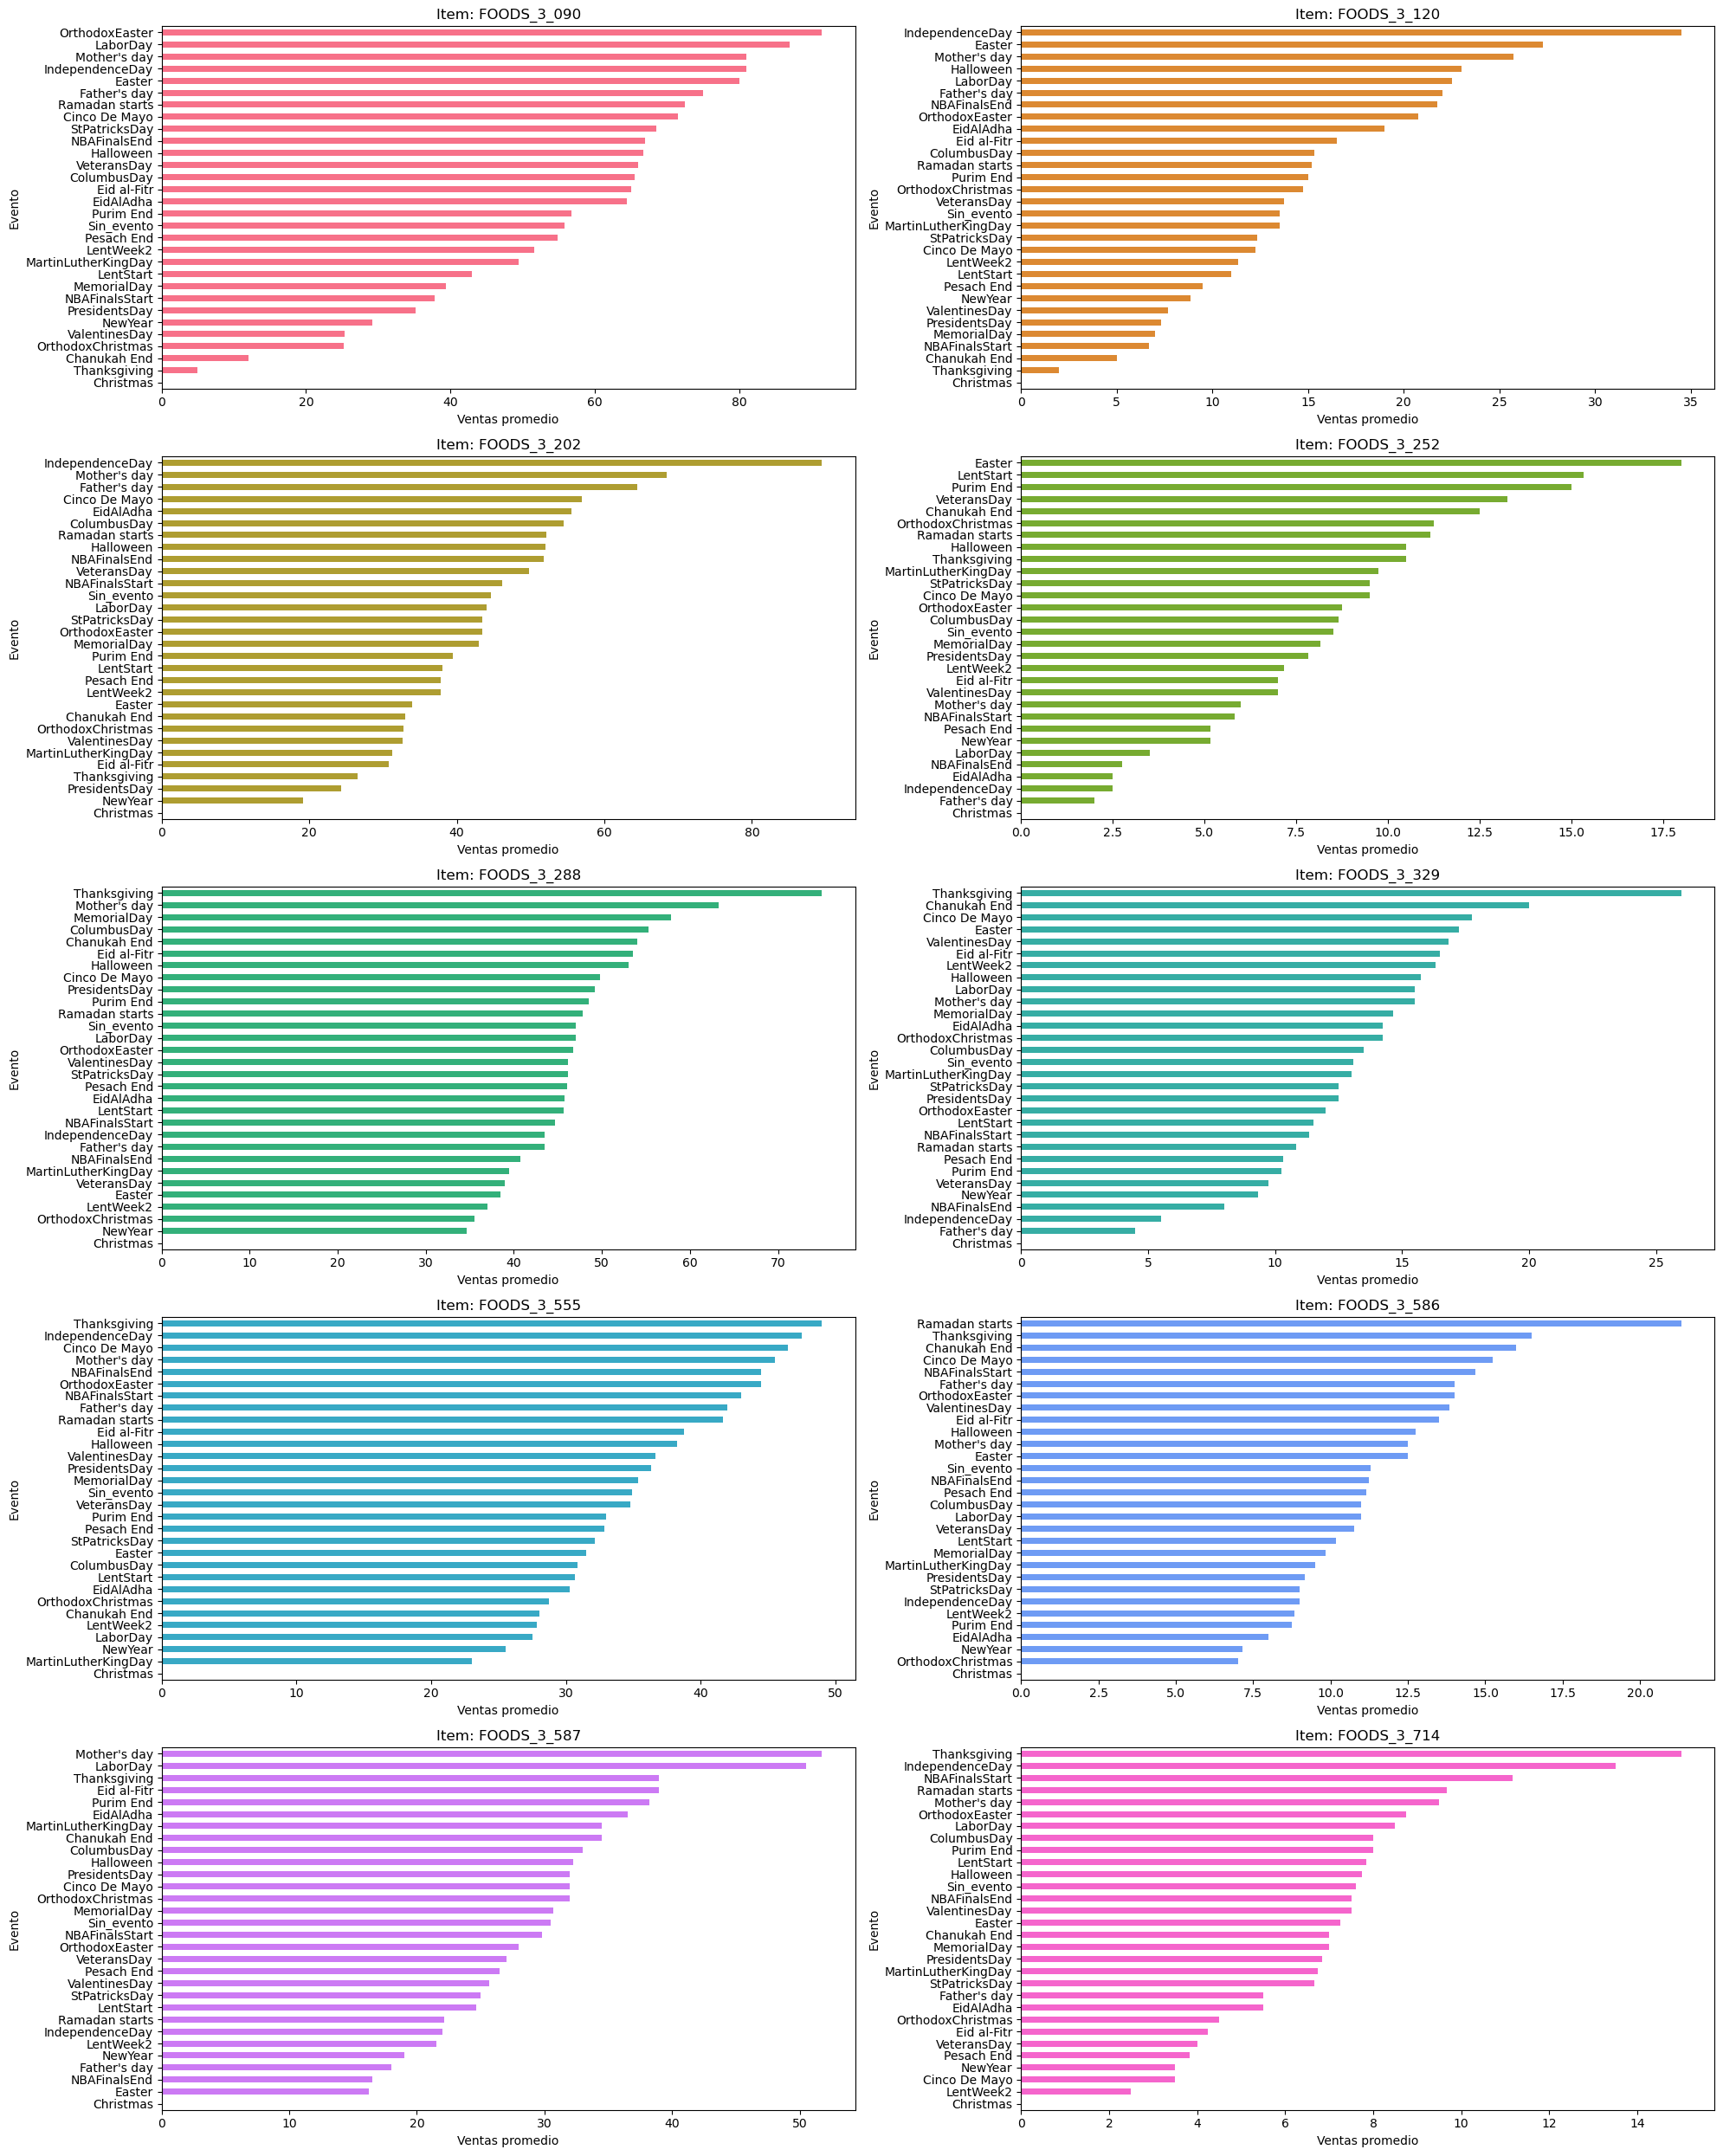

In [36]:
#Ventas de cada producto por evento ordenado descendente 
import matplotlib.pyplot as plt
import seaborn as sns

# Paleta de colores
colores = sns.color_palette("husl", n_colors=df['item_id'].nunique())

# Obtener los item_id únicos
items = df['item_id'].dropna().unique()

# Layout
n_cols = 2
n_rows = (len(items) + 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5 * n_rows))
axes = axes.flatten()

for i, item in enumerate(items):
    # Filtrar y agrupar por event_name_1 para ese item
    datos = df[df['item_id'] == item] \
                .groupby('event_name_1')['ventas'].mean() \
                .sort_values(ascending=False)
    
    # Graficar
    datos.plot(kind='barh', ax=axes[i], color=colores[i % len(colores)])
    axes[i].set_title(f"Item: {item}")
    axes[i].invert_yaxis()
    axes[i].set_xlabel("Ventas promedio")
    axes[i].set_ylabel("Evento")

# Eliminar ejes vacíos si sobran
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


#### 4.2.8. Estacionalidad por tipo de evento

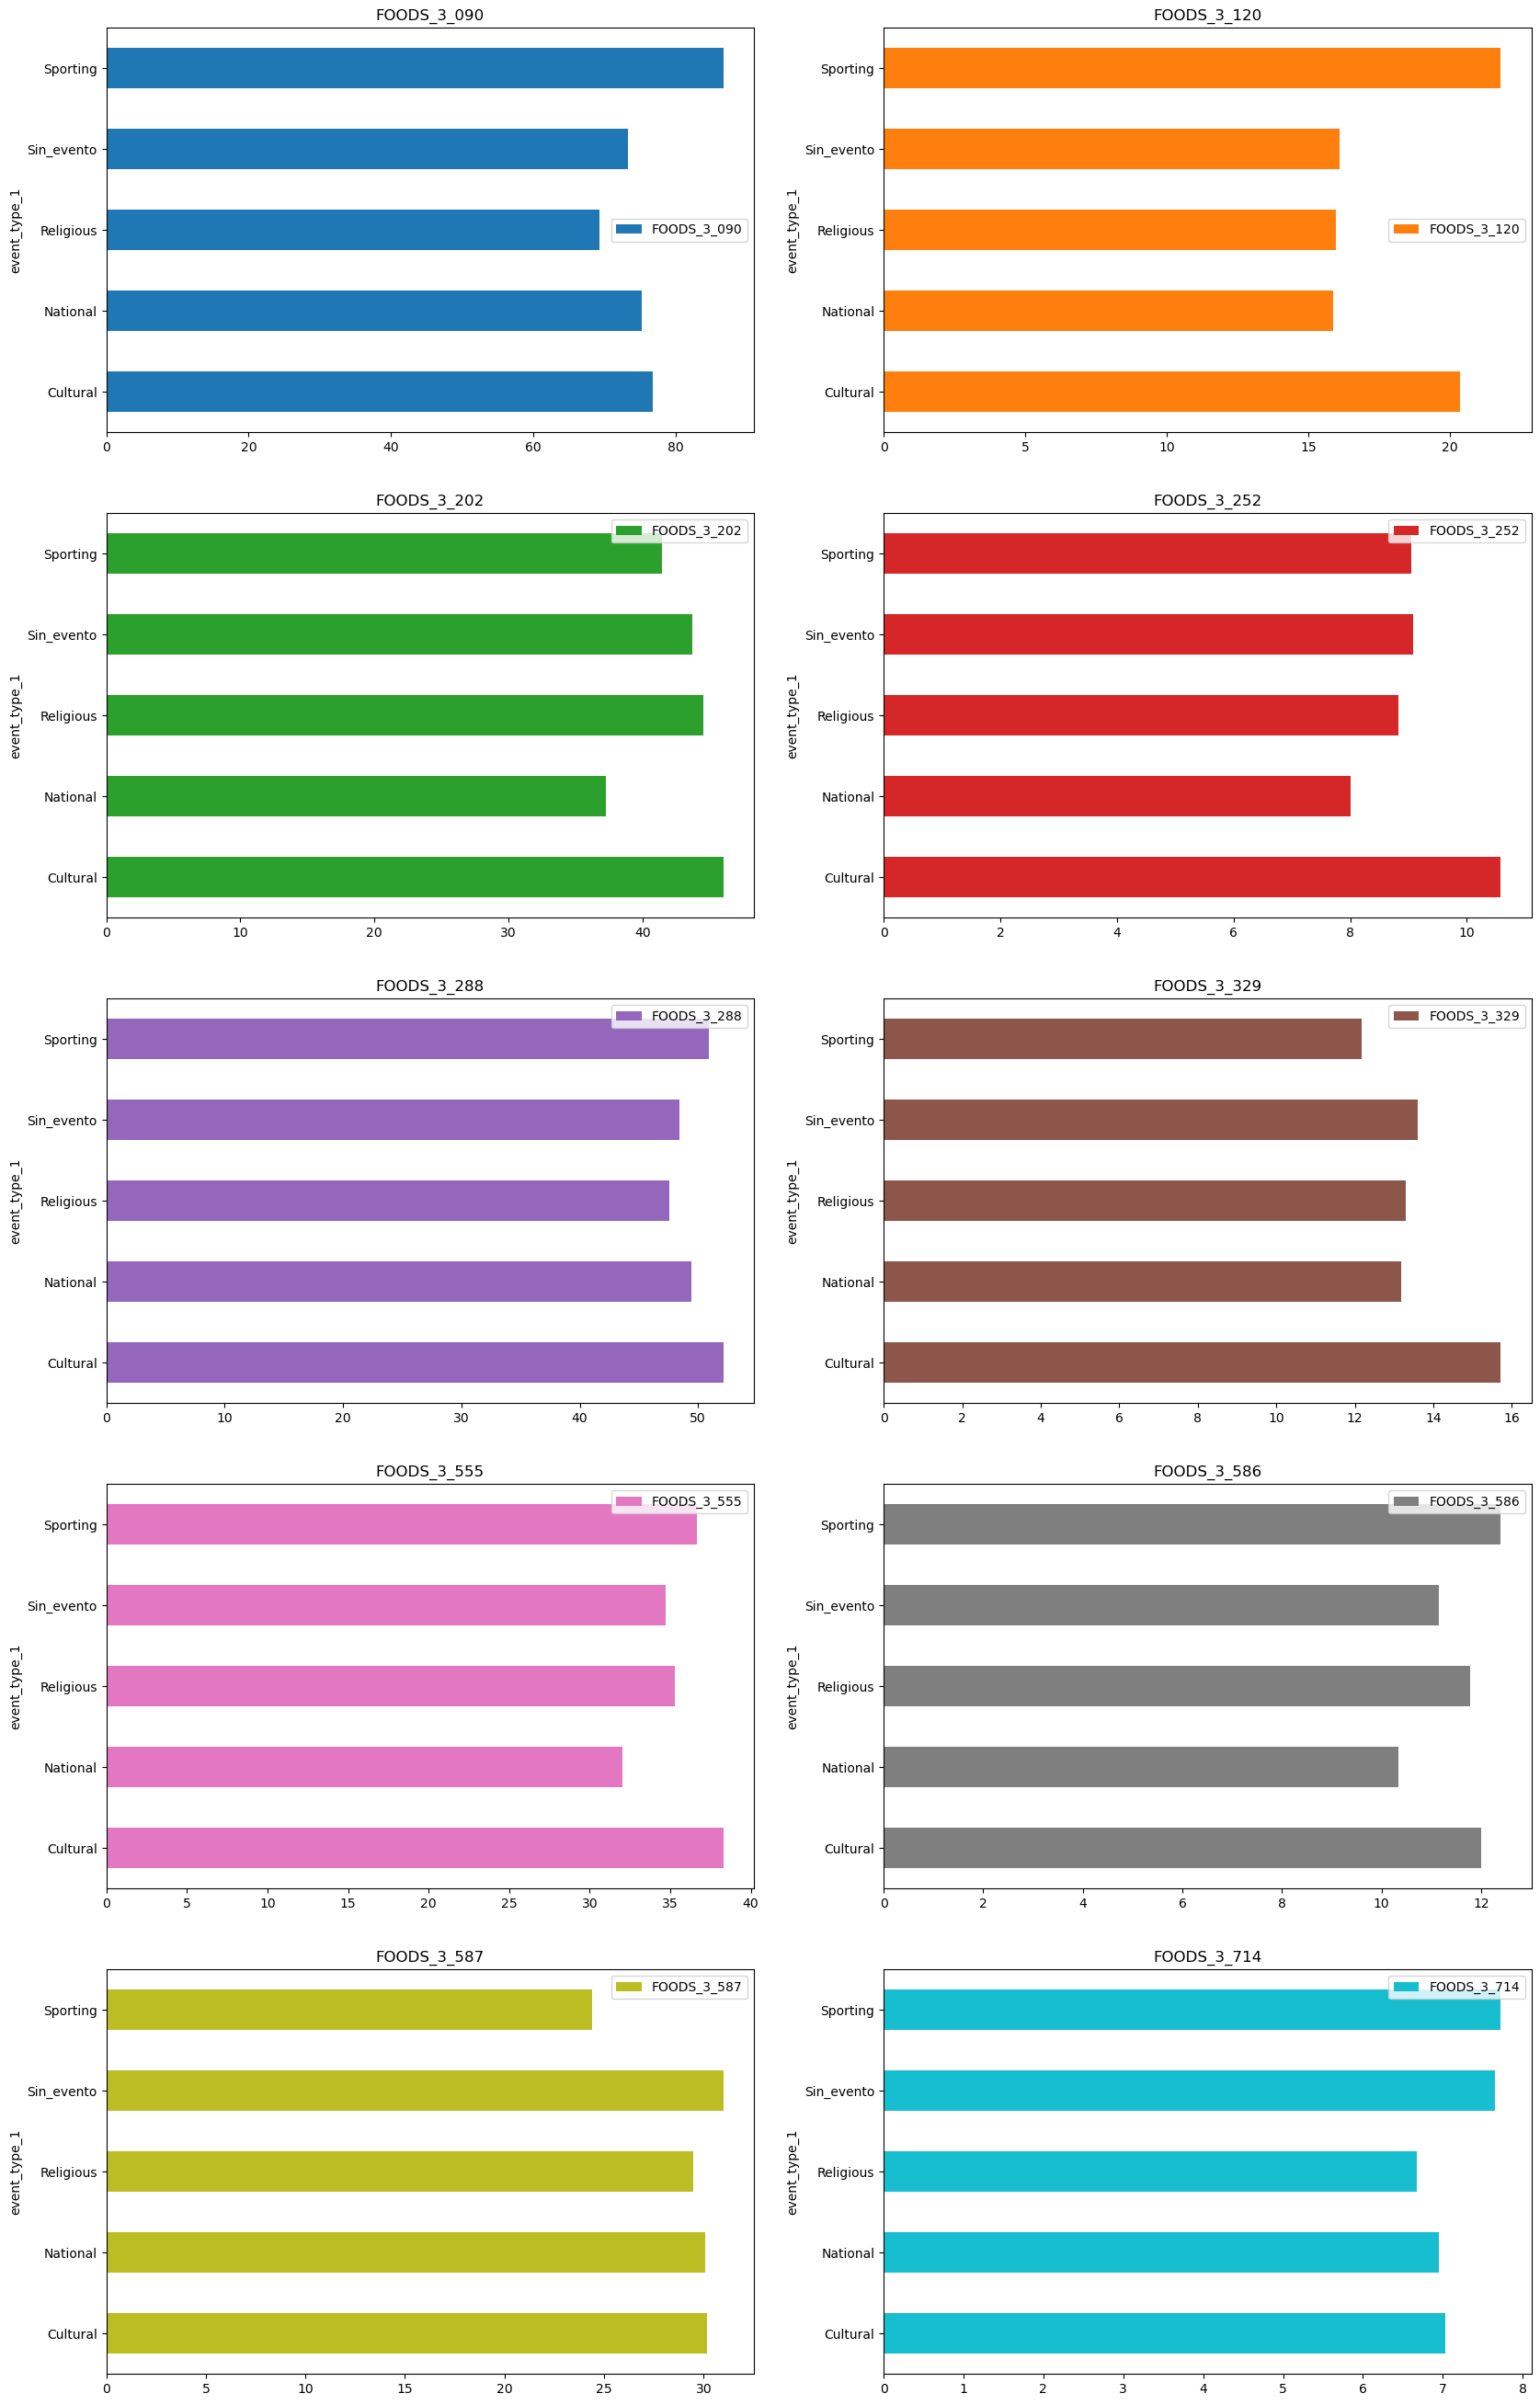

In [29]:
df.groupby(['event_type_1','item_id']).ventas.mean().unstack().plot.barh(subplots = True,  layout = (6,2), sharex=False, figsize=(20,40));

#### 4.2.9. Frecuencia total de ventas de cada producto por evento

Esto lo podríamos segmentar por tienda y ver lo que se consume según la zona que tendría sentido si fueran sitios con diferentes tipos de población de diferentes países para adaptar la oferta. Comida Halal o cualquier costumbre alimenticia 

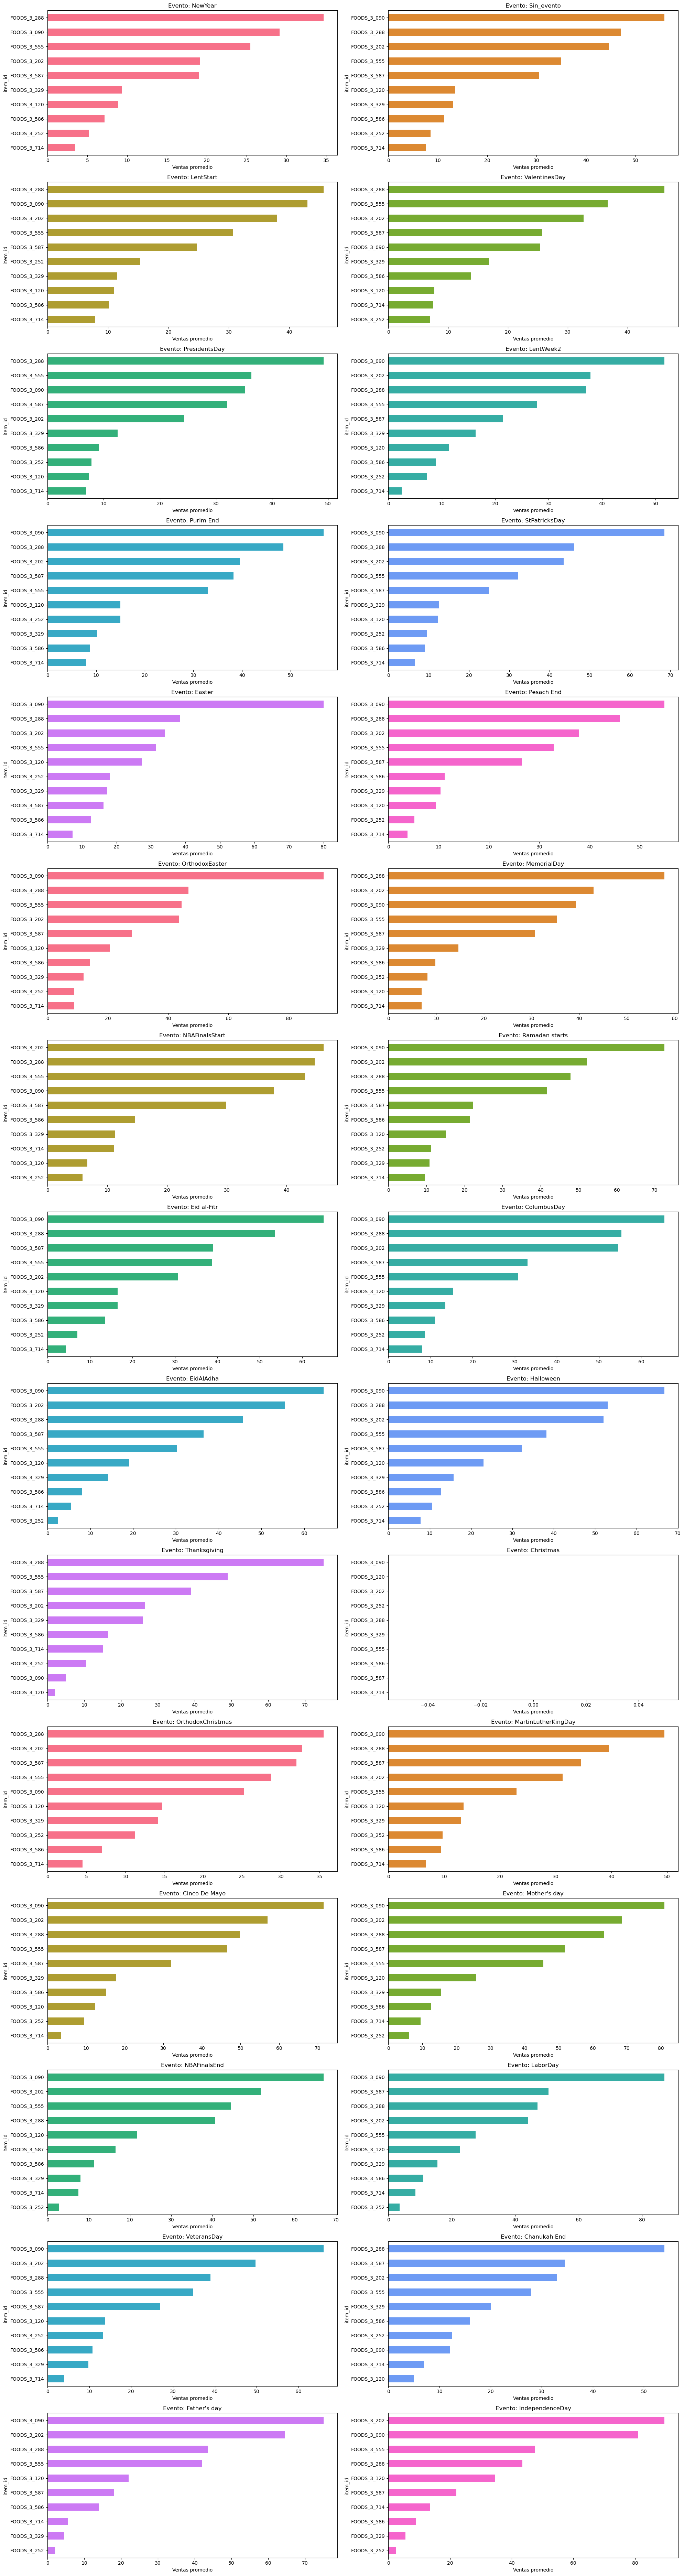

In [37]:
import matplotlib.pyplot as plt

# Obtener los eventos únicos
eventos = df['event_name_1'].dropna().unique()

# Parámetros del layout
n_cols = 2
n_rows = (len(eventos) + 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5 * n_rows))
axes = axes.flatten()

for i, evento in enumerate(eventos):
    # Filtrar y agrupar por item_id para ese evento
    datos = df[df['event_name_1'] == evento] \
                .groupby('item_id')['ventas'].mean() \
                .sort_values(ascending=False)
    
    # Graficar
    datos.plot(kind='barh', ax=axes[i], color=colores[i % len(colores)])
    axes[i].set_title(f"Evento: {evento}")
    axes[i].invert_yaxis()
    axes[i].set_xlabel("Ventas promedio")

# Eliminar ejes vacíos si sobran
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


Conclusiones:

* Todas estas variables sí parecen afectar lo cual es buena noticia

## 5. GUARDAR DATASETS TRAS CALIDAD DE DATOS

Guarda los avances en cat y num con un sufijo para poder guardar o recuperar avances del proyecto.

En formato pickle para no perder las modificaciones de metadatos.

*NOTA: En algunos casos no hay cambios en los ficheros en esta fase, así que este paso es opcional.Pero si no guardas estos ficheros acuérdate de modificar la importación en el siguiente notebook.*

In [38]:
#Definir los nombres de los archivos
ruta_cat = ruta_proyecto + '/02_Datos/03_Trabajo/' + 'cat_resultado_eda.pickle'
ruta_num = ruta_proyecto + '/02_Datos/03_Trabajo/' + 'num_resultado_eda.pickle'

In [39]:
#Guardar los archivos
cat.to_pickle(ruta_cat)
num.to_pickle(ruta_num)